# Frequency Domain

## Definitions

### Fourier Transform


FFT is a discrete Fourier transform algorithm which converts a signal from the **time domain** (signal strength as a function of time) to the **frequency domain** (signal strength as a function of frequency). Here's a [youtube video](https://www.youtube.com/watch?v=r18Gi8lSkfM&t=1s) that provides a nice visual representation of how it works.

- continuous and discretized equations
- example figure
- matlab

### Power spectrum

- definition
- formula

Calculate on MATLAB as follows:
``` Octave
[ps,f_ps] = periodogram(Y,rectwin(N),N,Fs, 'power');
```

### Power spectral density (PSD)

The power spectral density (PSD) shows where the average power (as it is a density) is distributed as a function of frequency, around one time window. It is expressed in `dB/Hz`.

- formula

Calculate on MATLAB as follows:
``` Octave
[psd,f_psd] = periodogram(Y,rectwin(N),N,Fs);
```

MATLAB also provides a [nice tutorial](https://www.mathworks.com/help/signal/ug/power-spectral-density-estimates-using-fft.html) for how to calculate both PSD and power spectra with and without the `periodogram()` function.


## Examples

The following section is dedicated to using MATLAB to develop an intuition for 1) how to calculate these metrics, and 2) how they are effected by changes in signal duration, frequency, amplitude among signal types.

### Common parameters

In [1]:
a = [1 2];      % signal amplitudes
f = [10 15];    % signal frequencies
d = [2 3];      % signal durations
D = 4;          % total duration
Fs = 1e3;       % sampling frequency

### Define plotting function

The following function will make it convenient for us to loop through all combinations of parameterizations, construct a given signal, calculate the metrics, and plot the output.

In [2]:
%%file plot_ps_psd.m
function plot_ps_psd(signal_type,a,f,d,Fs,D)
%% plot_ps_psd(signal_type,a,f,d,Fs,D)

dt = 1/Fs;      % sampling interval
N = Fs*D;       % length of total (samples)
T = 0:dt:D-dt;  % timesteps of total

cnt=1;
for(ii = 1:length(a))
    a_i = a(ii); % amplitude
    for(jj = 1:length(f))
        f_i = f(jj); % frequency
        figure
        for(kk = 1:length(d))
            d_i = d(kk); % duration
            
            % length of signal (samples)
            n = Fs*d_i;     
            
            % start of signal (samples)
            s0 = N/2-n/2;   
            
            % timesteps of signal
            t = 0:dt:d_i-dt;
            
            % create pad
            pad = zeros(1,s0);
            
            % create signal
            switch lower(signal_type)                
                case 'noise'
                    y = a_i/2*randn(1,n);
                    f_i = NaN; % frequency doesn't apply here
                case 'sine'
                    y = a_i*sin(2*pi*f_i*t);
                case 'pulse'
                    y = a_i*gauspuls(t,f_i,0.5,-30);
                case 'pulsetrain'                    
                    
                    % create single pulse
                    y_pulse = a_i*gauspuls(t,f_i,0.5,-30);
                    
                    % number of pulses
                    npls = 3;

                    % crop single pulse
                    pls = y_pulse(1:floor(n/npls));

                    % repeat single pulse
                    pls = repmat(pls,1,npls);

                    % combine in zero-padded array
                    y = zeros(1,n);
                    y(1:length(pls)) = pls;
                
                case 'chirp'
                    y = chirp(t,0,d_i,f_i,'linear', -90);
            end

            % pad signal
            Y = [pad y pad];
            
            % power spectrum
            [ps,f_ps] = periodogram(Y,rectwin(N),N,Fs, 'power');
            [max_ps, imax] = max(ps);
            max_f_ps = f_ps(imax);
            
            % power spectral density
            [psd,f_psd] = periodogram(Y,rectwin(N),N,Fs);
            [max_psd, imax] = max(psd);
            max_f_psd = f_psd(imax);
            
            % plot            
            subplot(3,2,kk)
            plot(T, Y); grid on;
            ylim([-a_i a_i]*2)
            ylabel('Amplitude')
            xlabel('Time')
            title({'Signal',...
                sprintf('Amplitude: %1d  Duration: %1d  Frequency: %1d', a_i, d_i, f_i)})
            
            subplot(3,2,kk+2)
            plot(f_ps,10*log10(ps)); grid on;
            ylim([-100 0])
            ylabel('Power [dB]')
            xlabel('Frequency [Hz]')
            title({'Power spectrum',...
                sprintf('Max: %.03f uPa  Max freq: %d', max_ps, max_f_ps)})
            
            subplot(3,2,kk+4)
            plot(f_psd,10*log10(psd)); grid on;
            ylim([-100 0])
            ylabel('Power/frequency [dB/Hz]')
            xlabel('Normalized frequency [Hz]')
            title({'Power spectral density',...
                sprintf('Max: %.03f uPa  Max freq: %d', max_psd, max_f_psd)})
            
            % increase figure size
            set(gcf, 'PaperPosition', [0 0 18 20]); 
            
            % update counter
            cnt=cnt+1;
        end
    end
end

return

Created file '/Users/hansenjohnson/Projects/intro-acoustics/docs/plot_ps_psd.m'.


### White noise

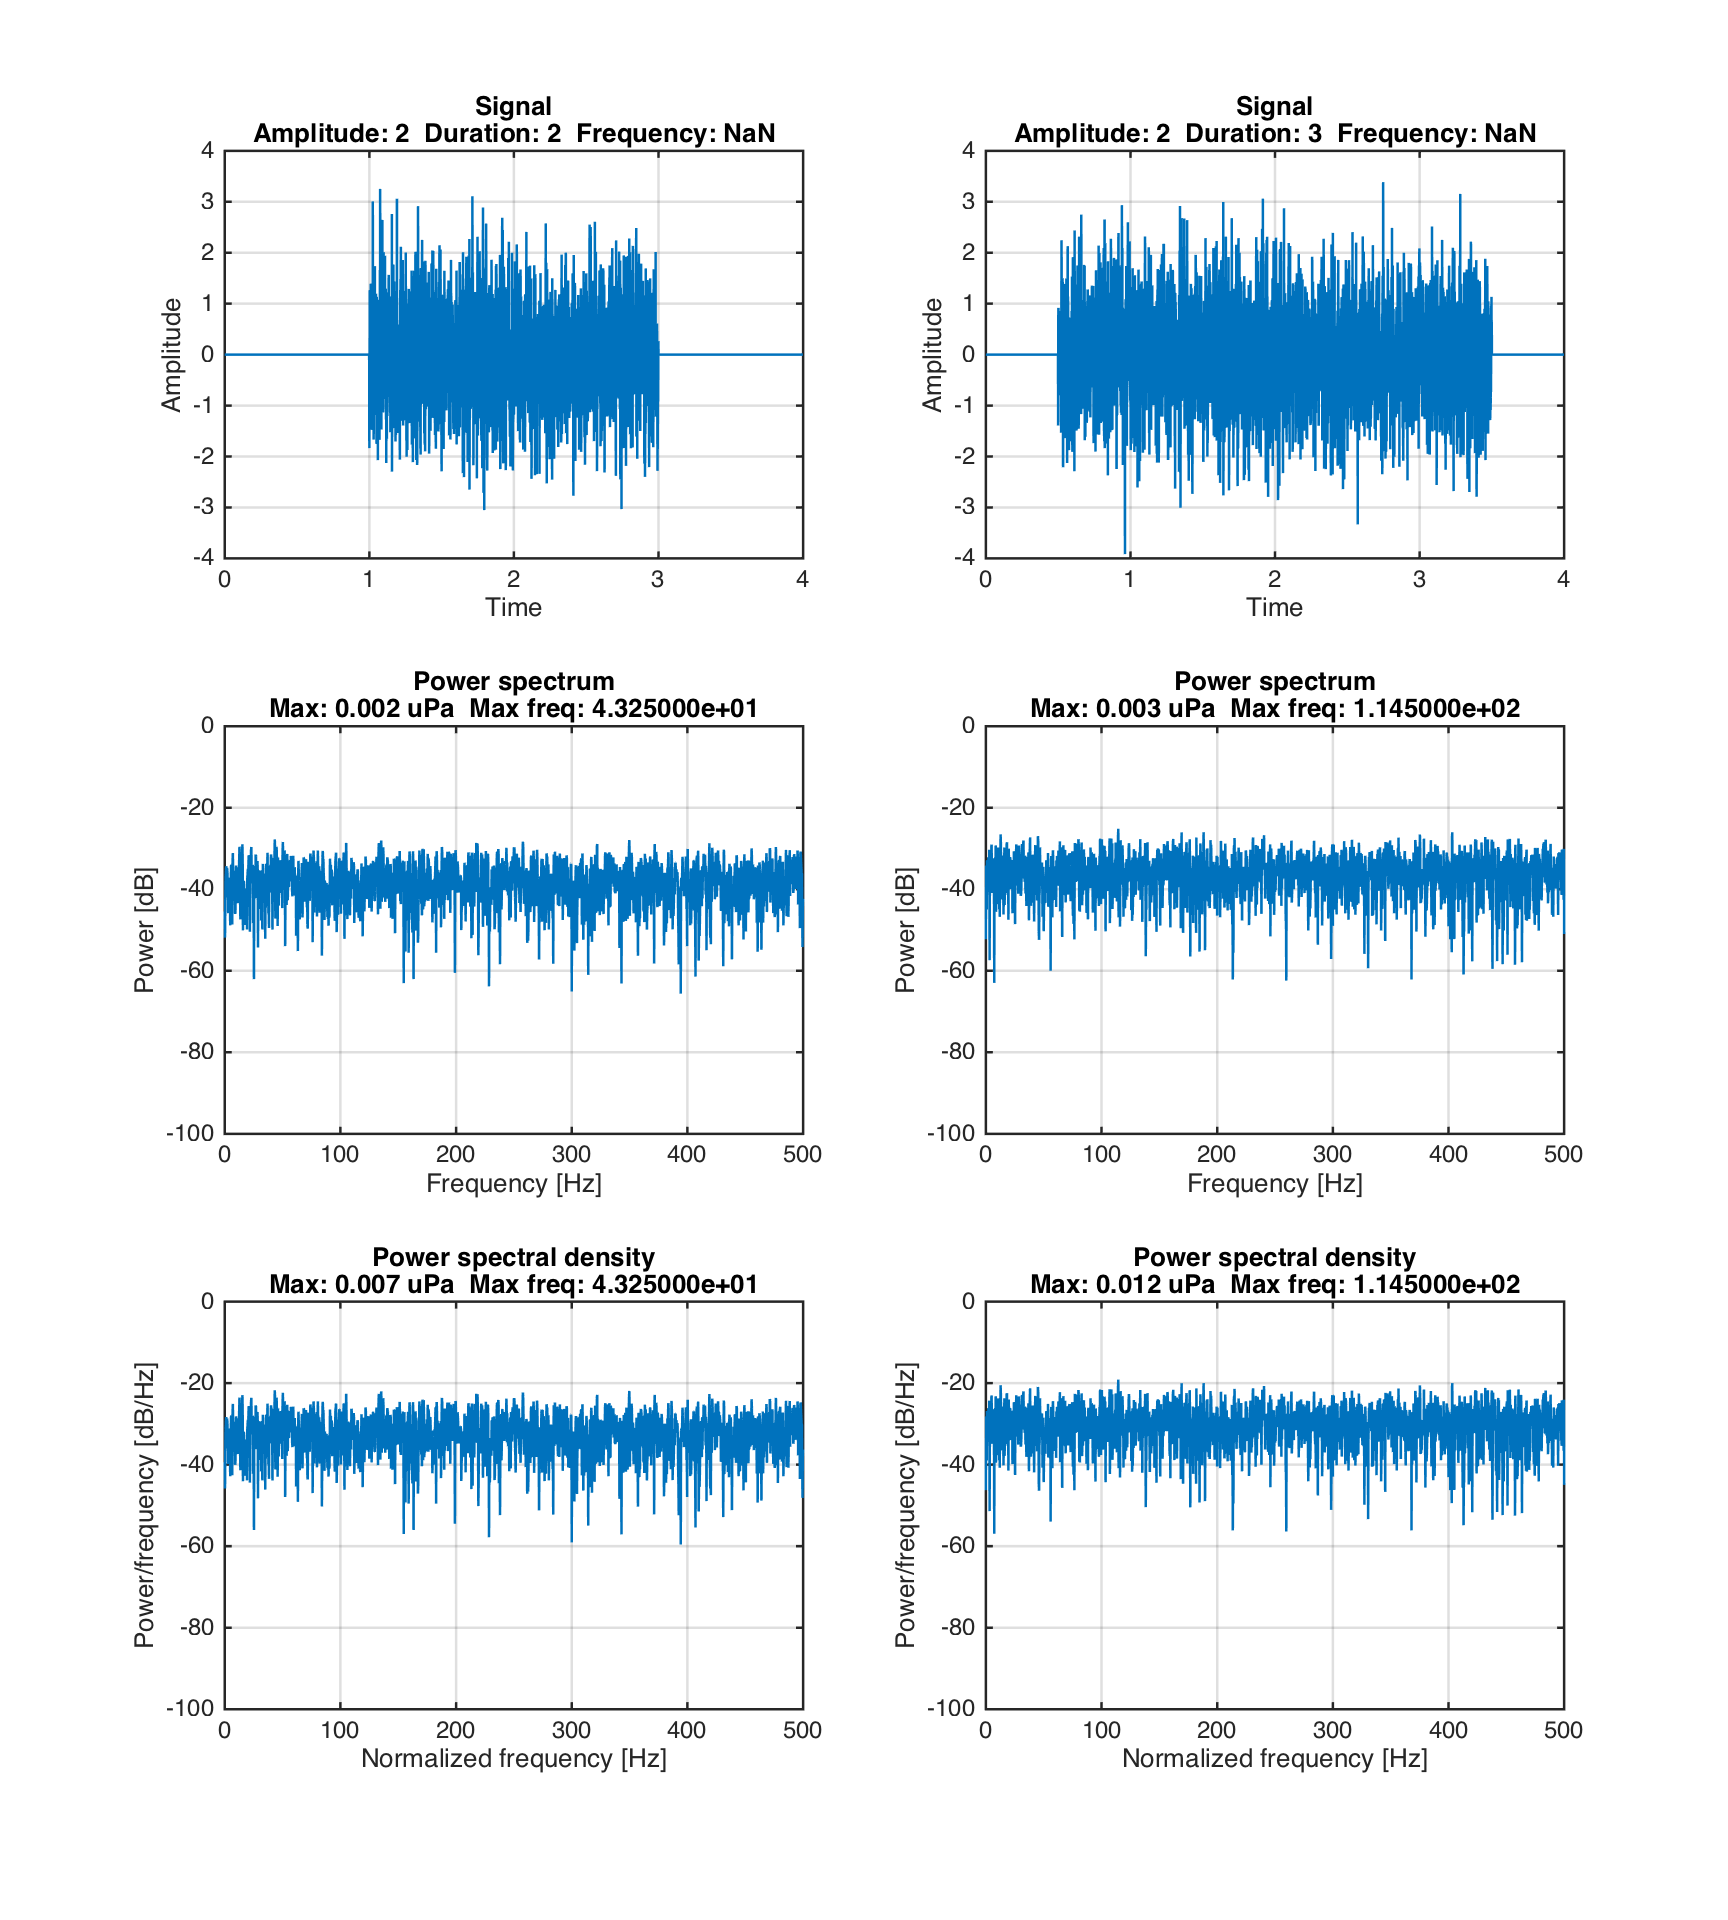

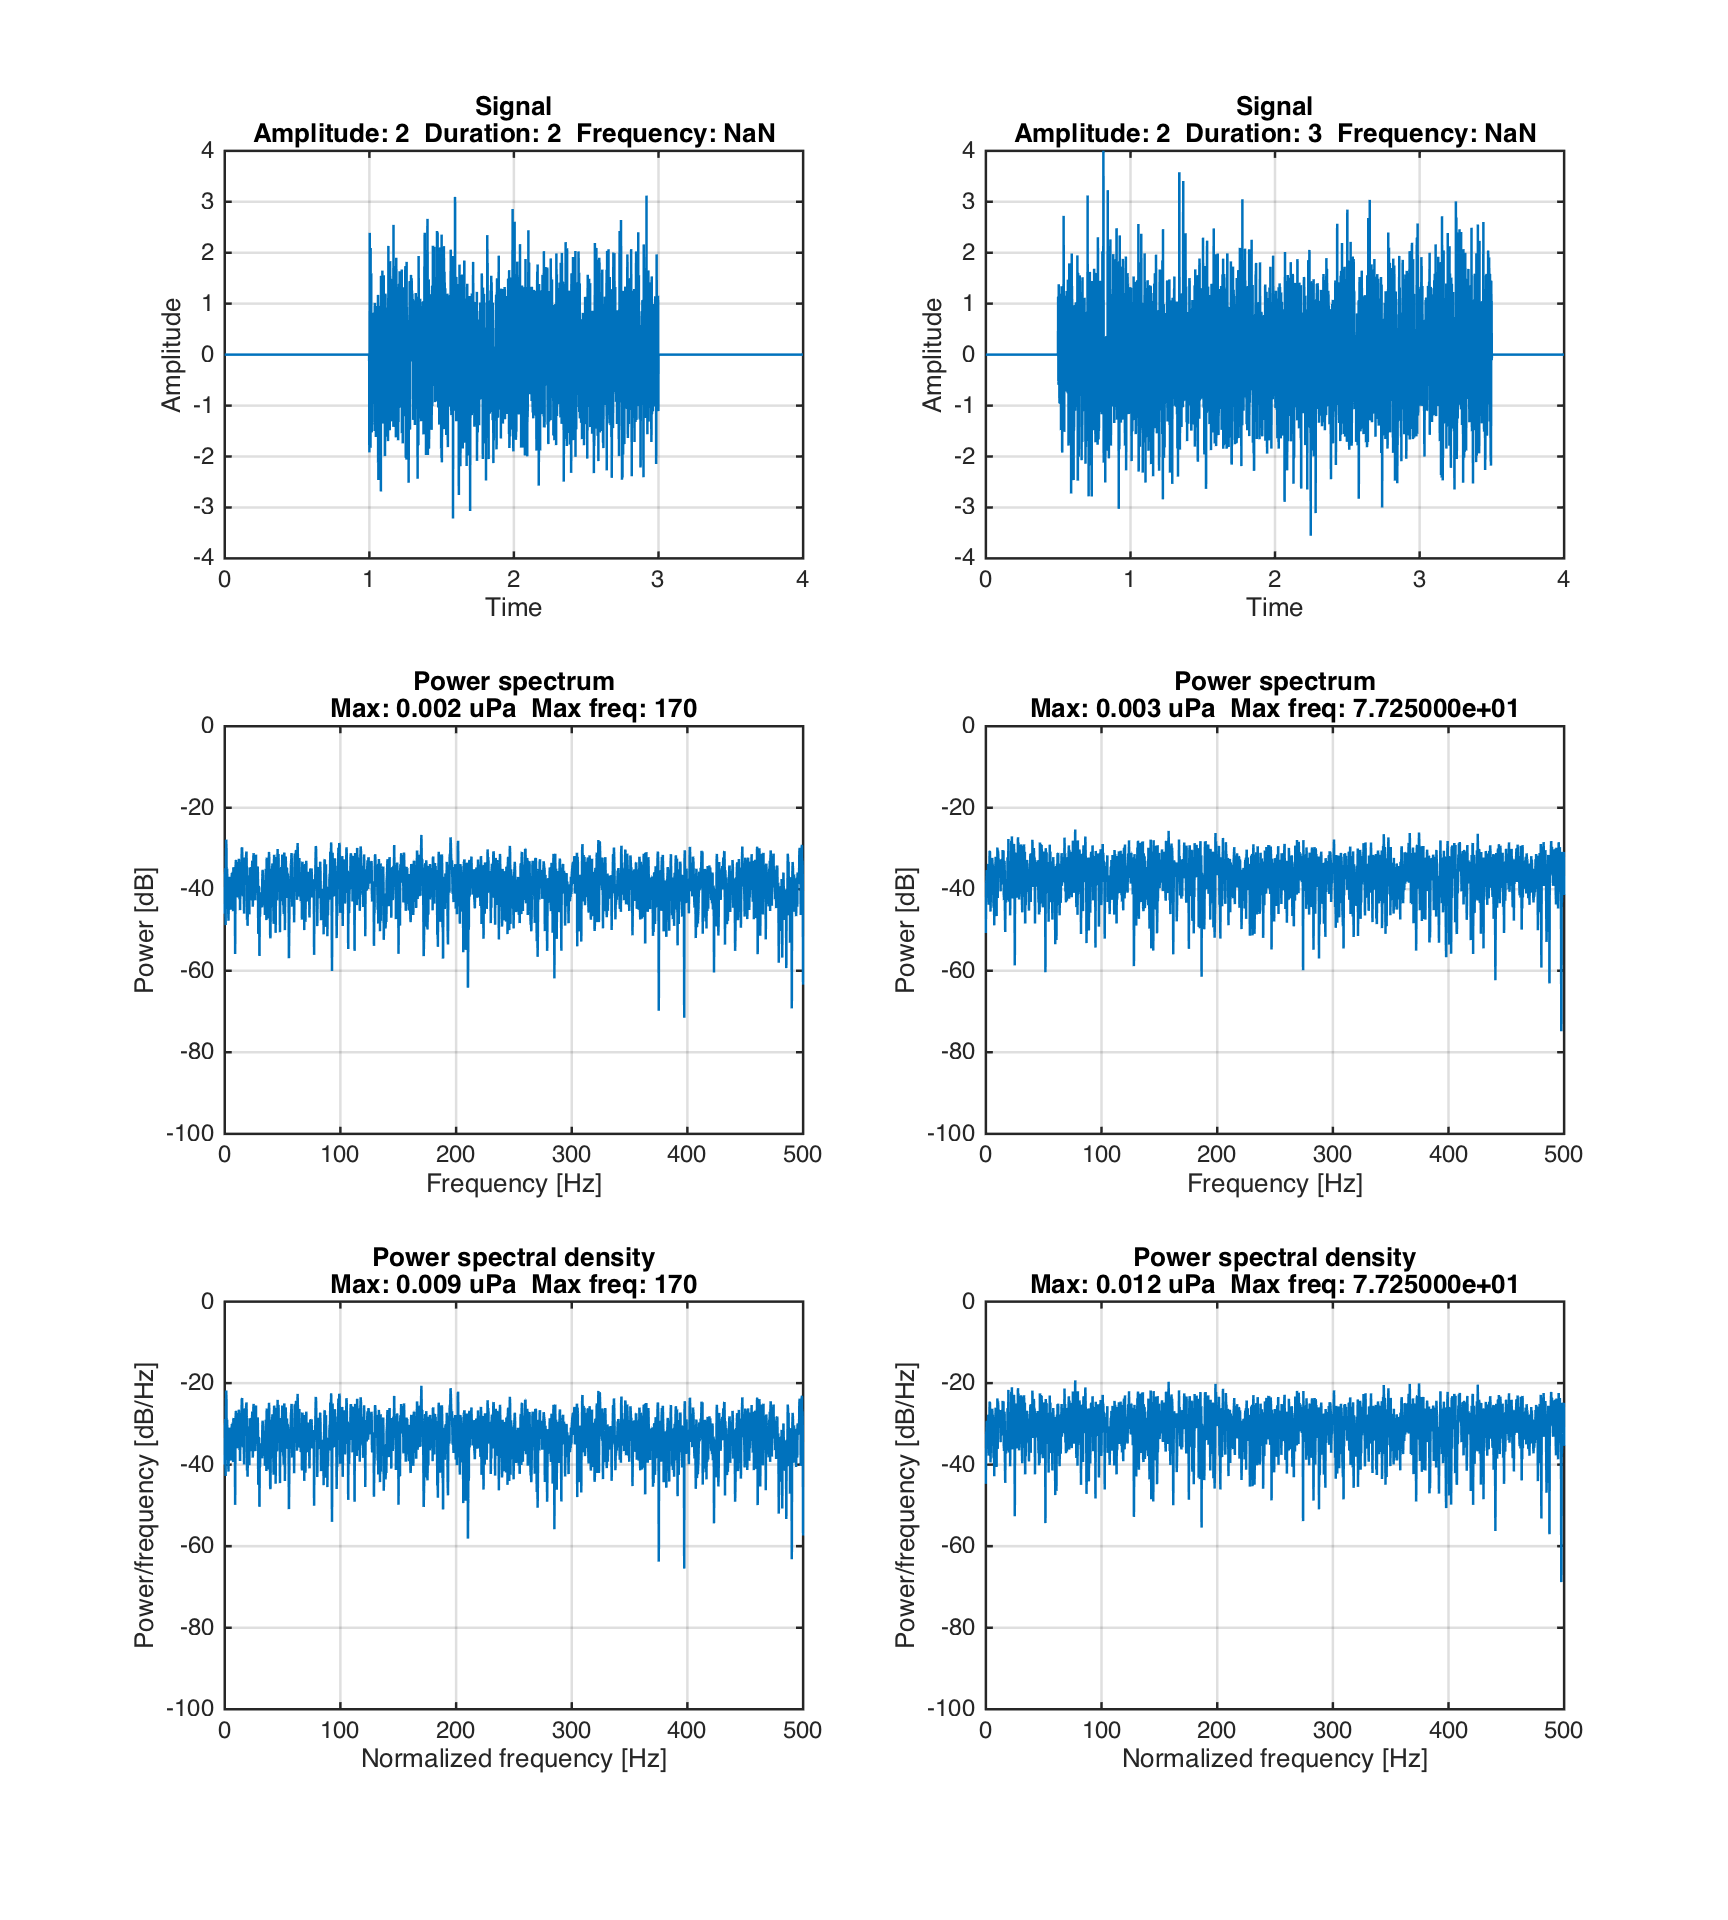

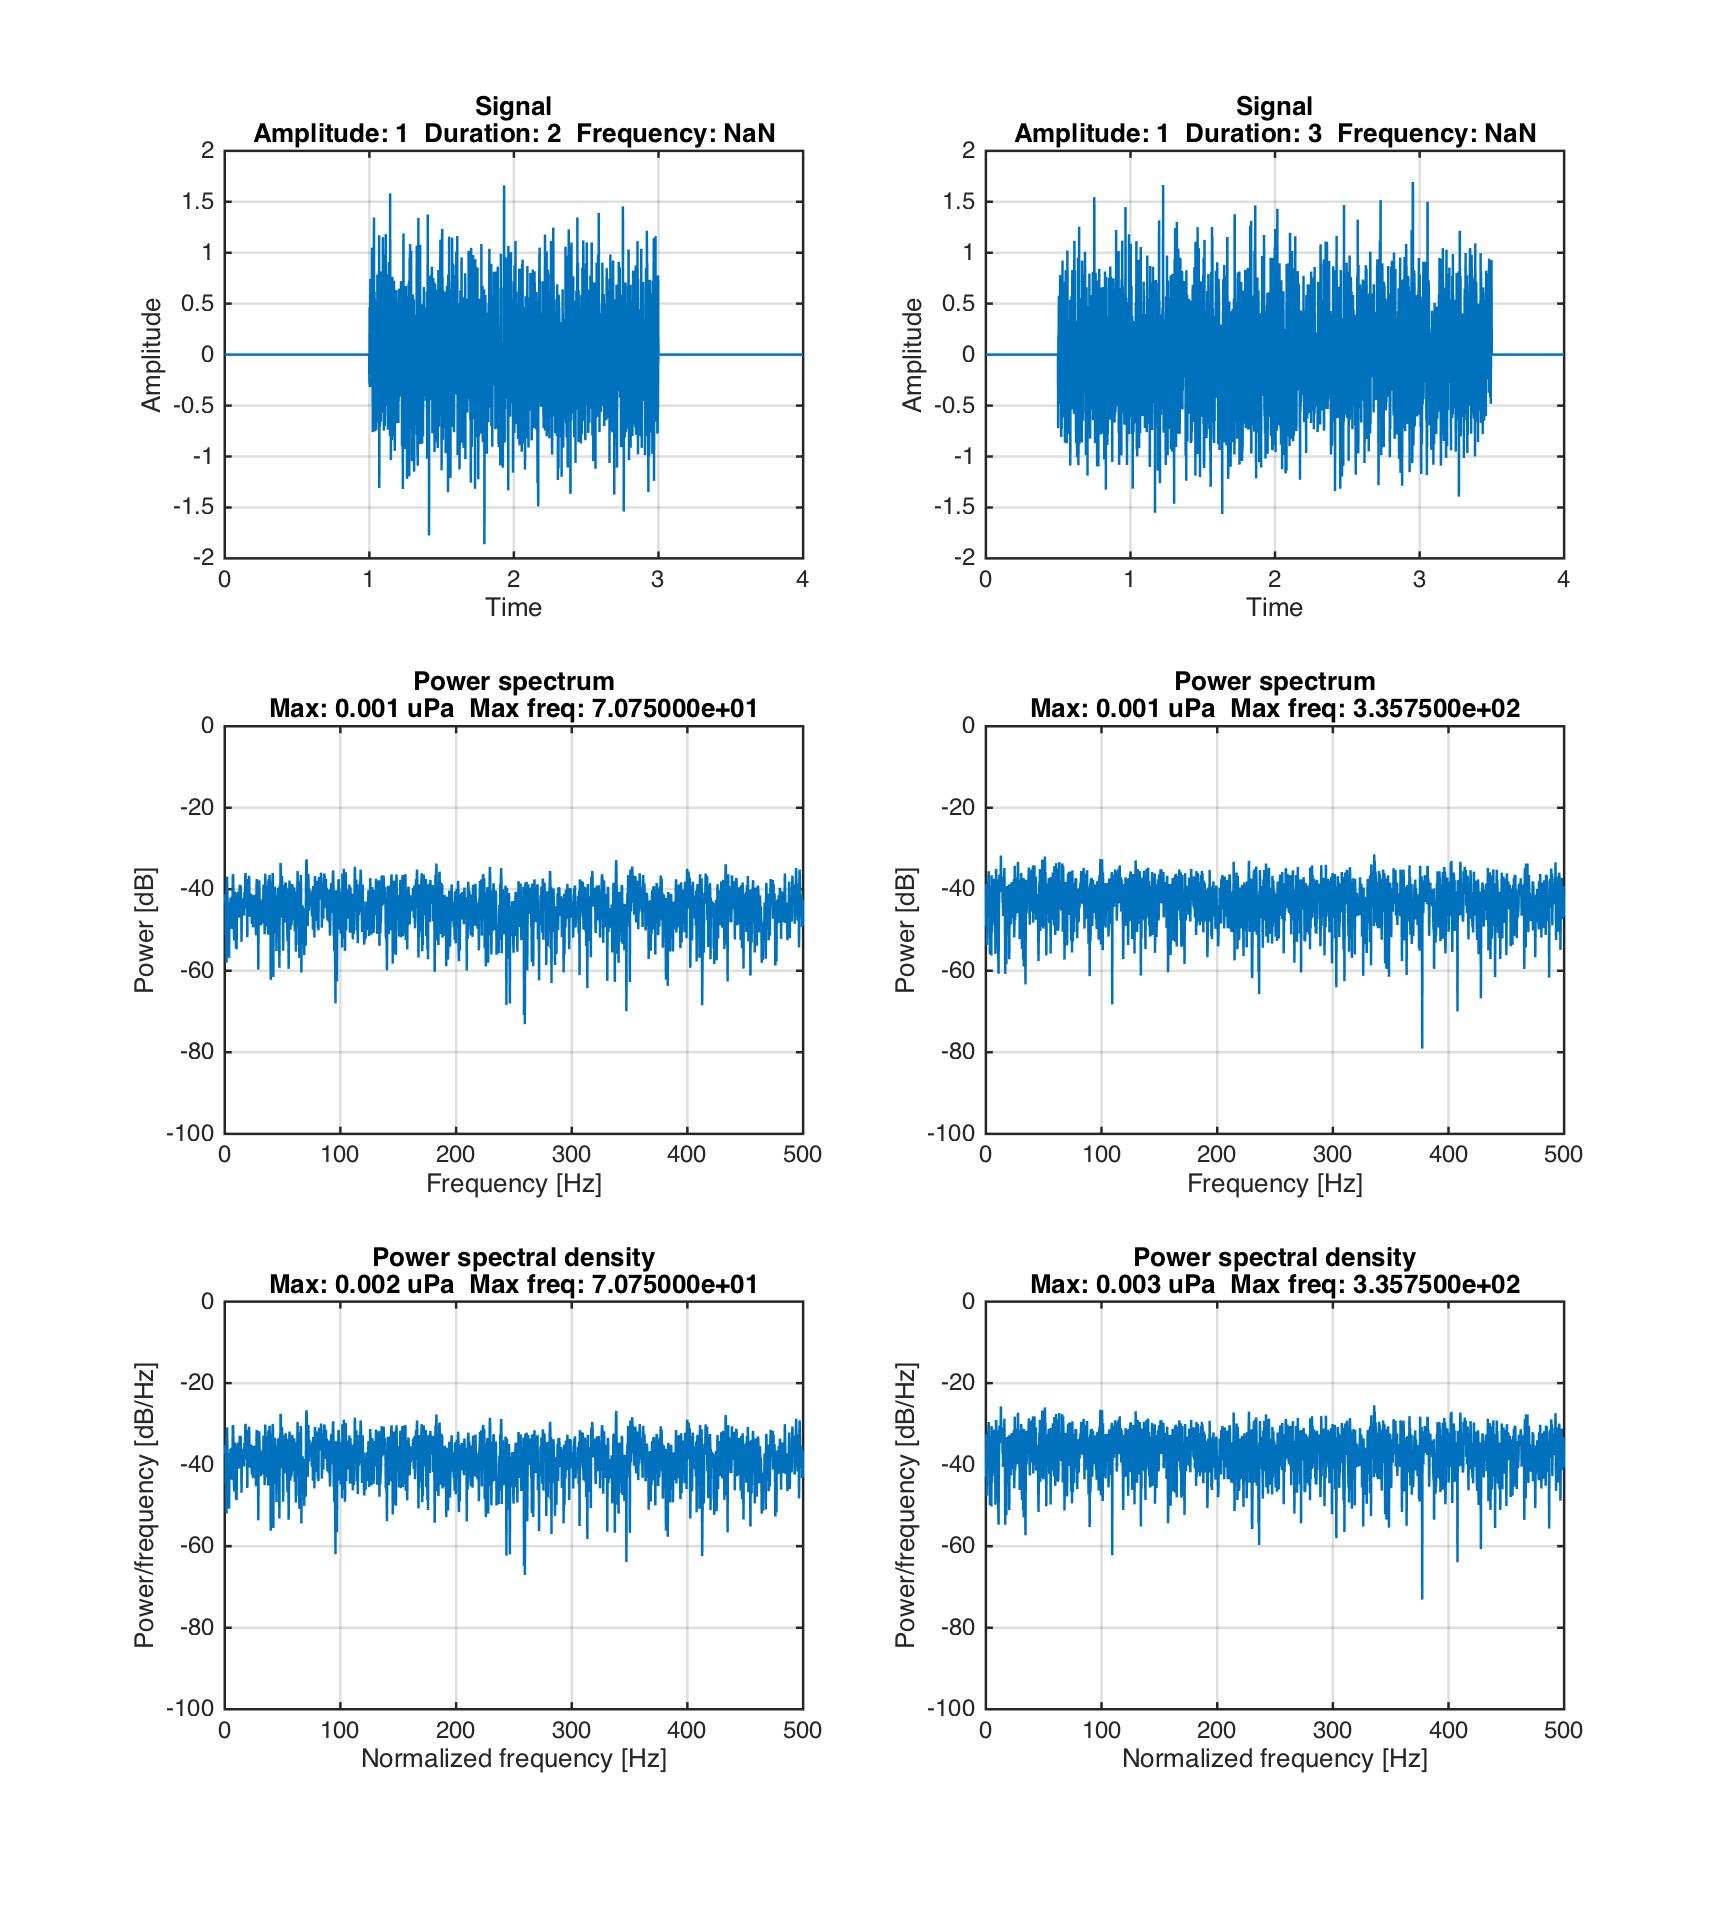

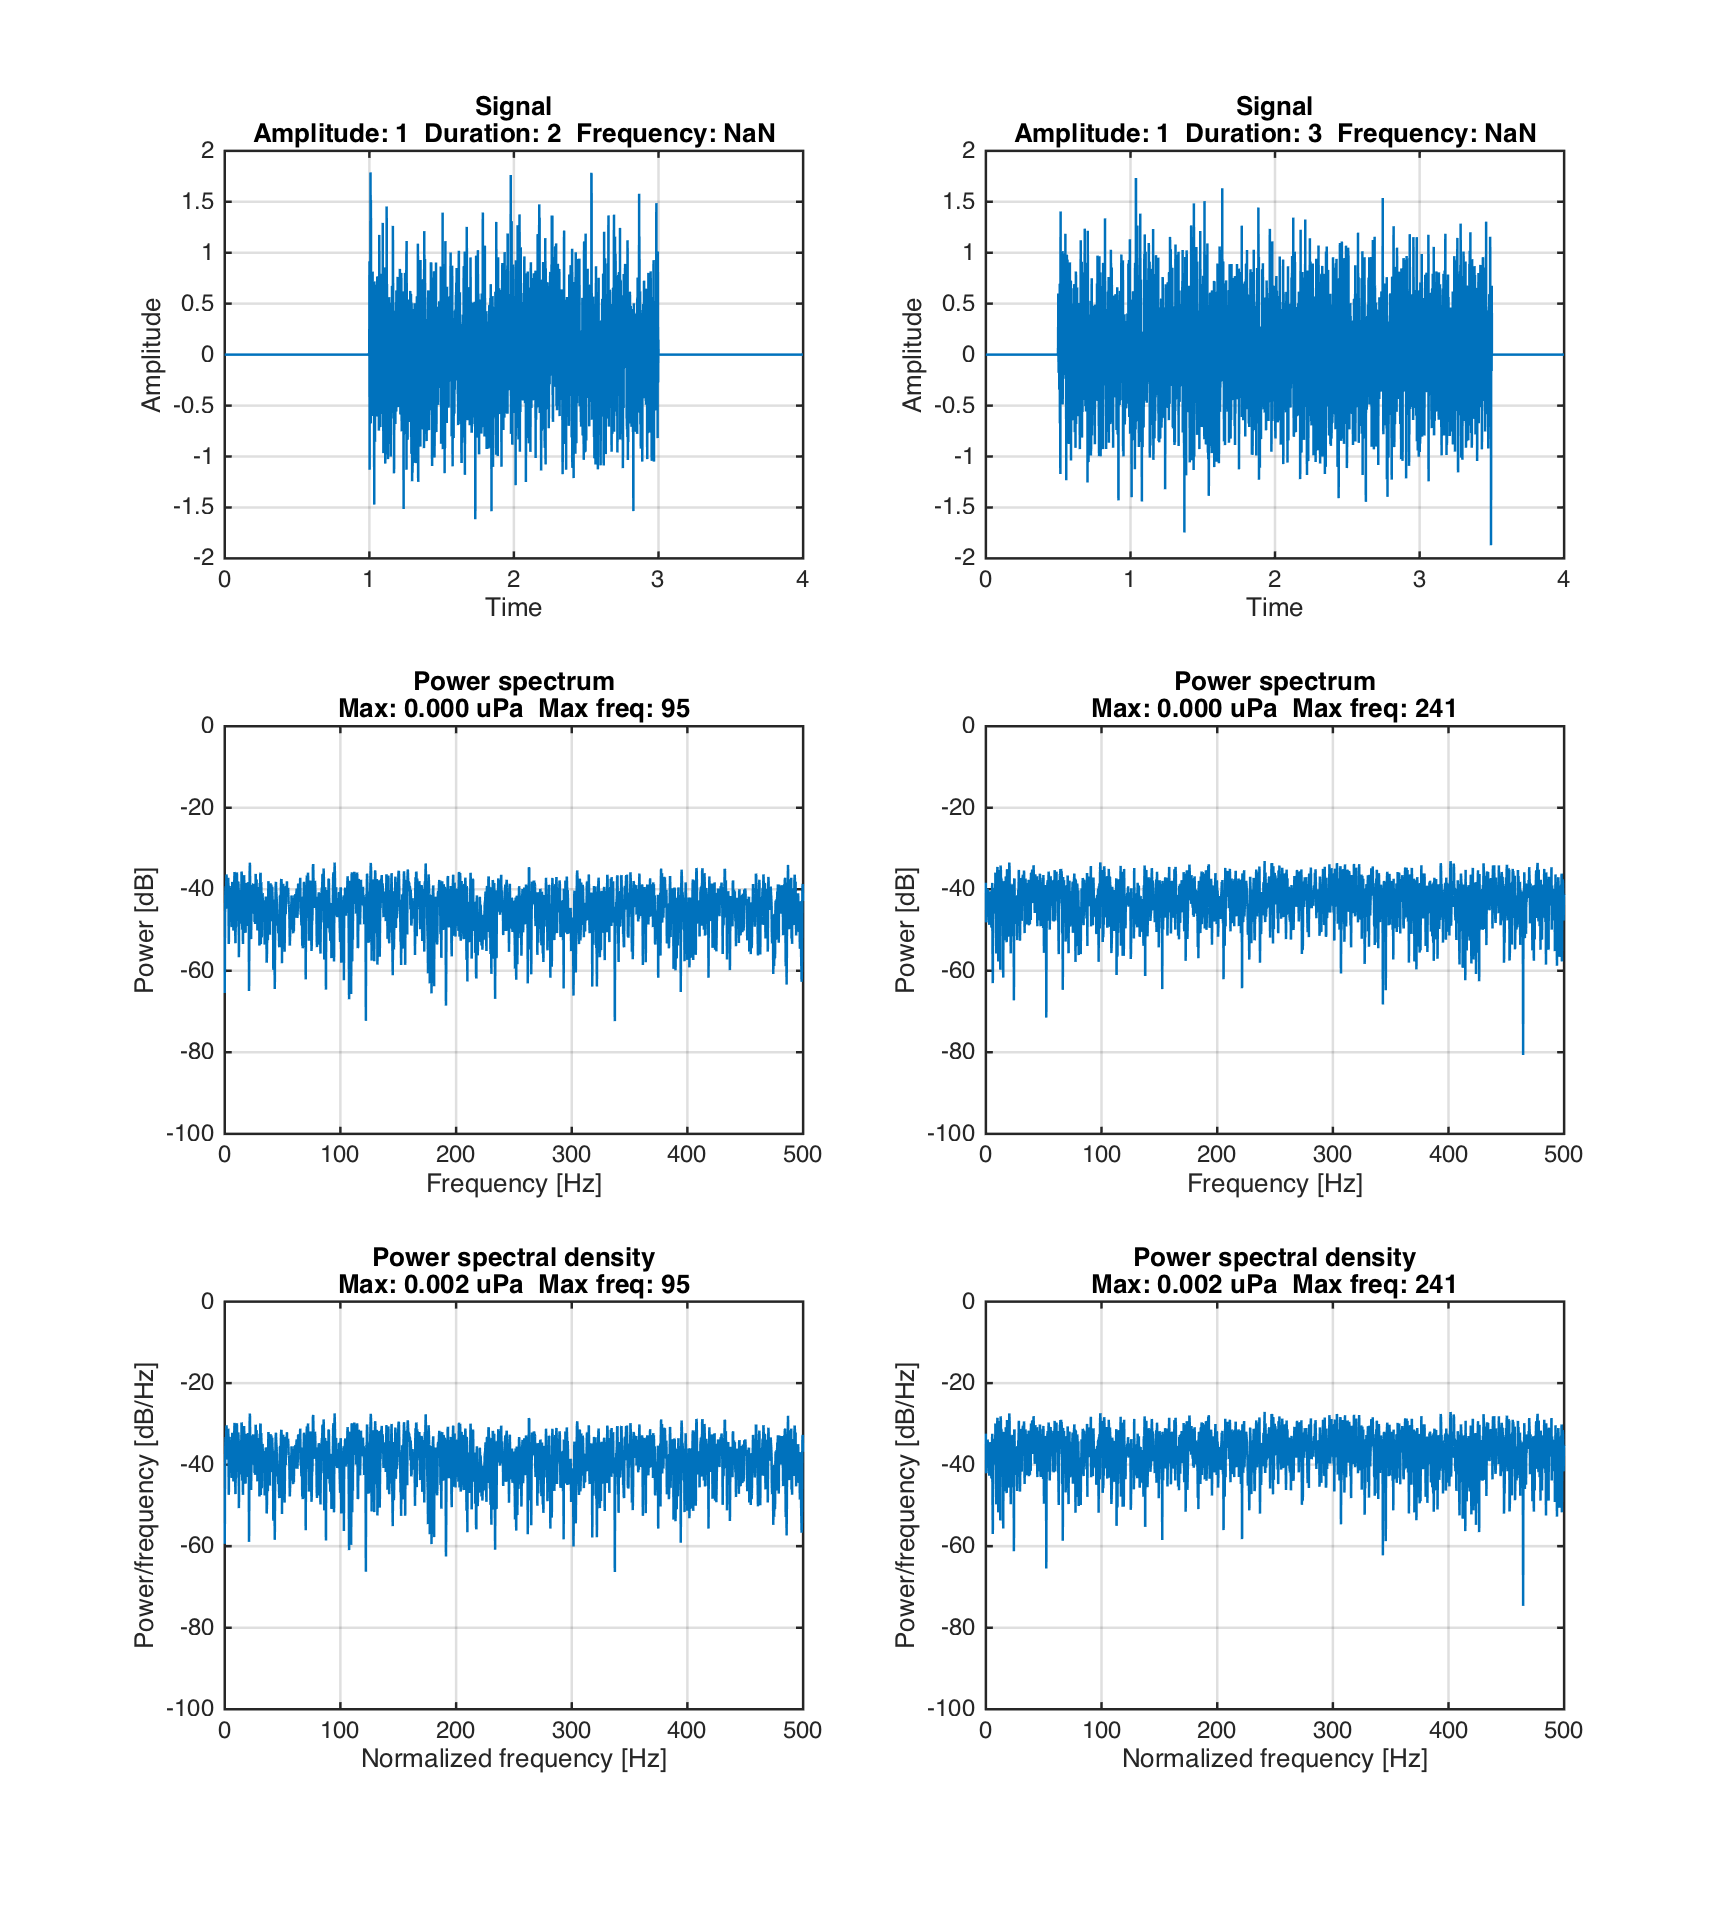

In [3]:
plot_ps_psd('noise',a,f,d,Fs,D);

### Sine wave

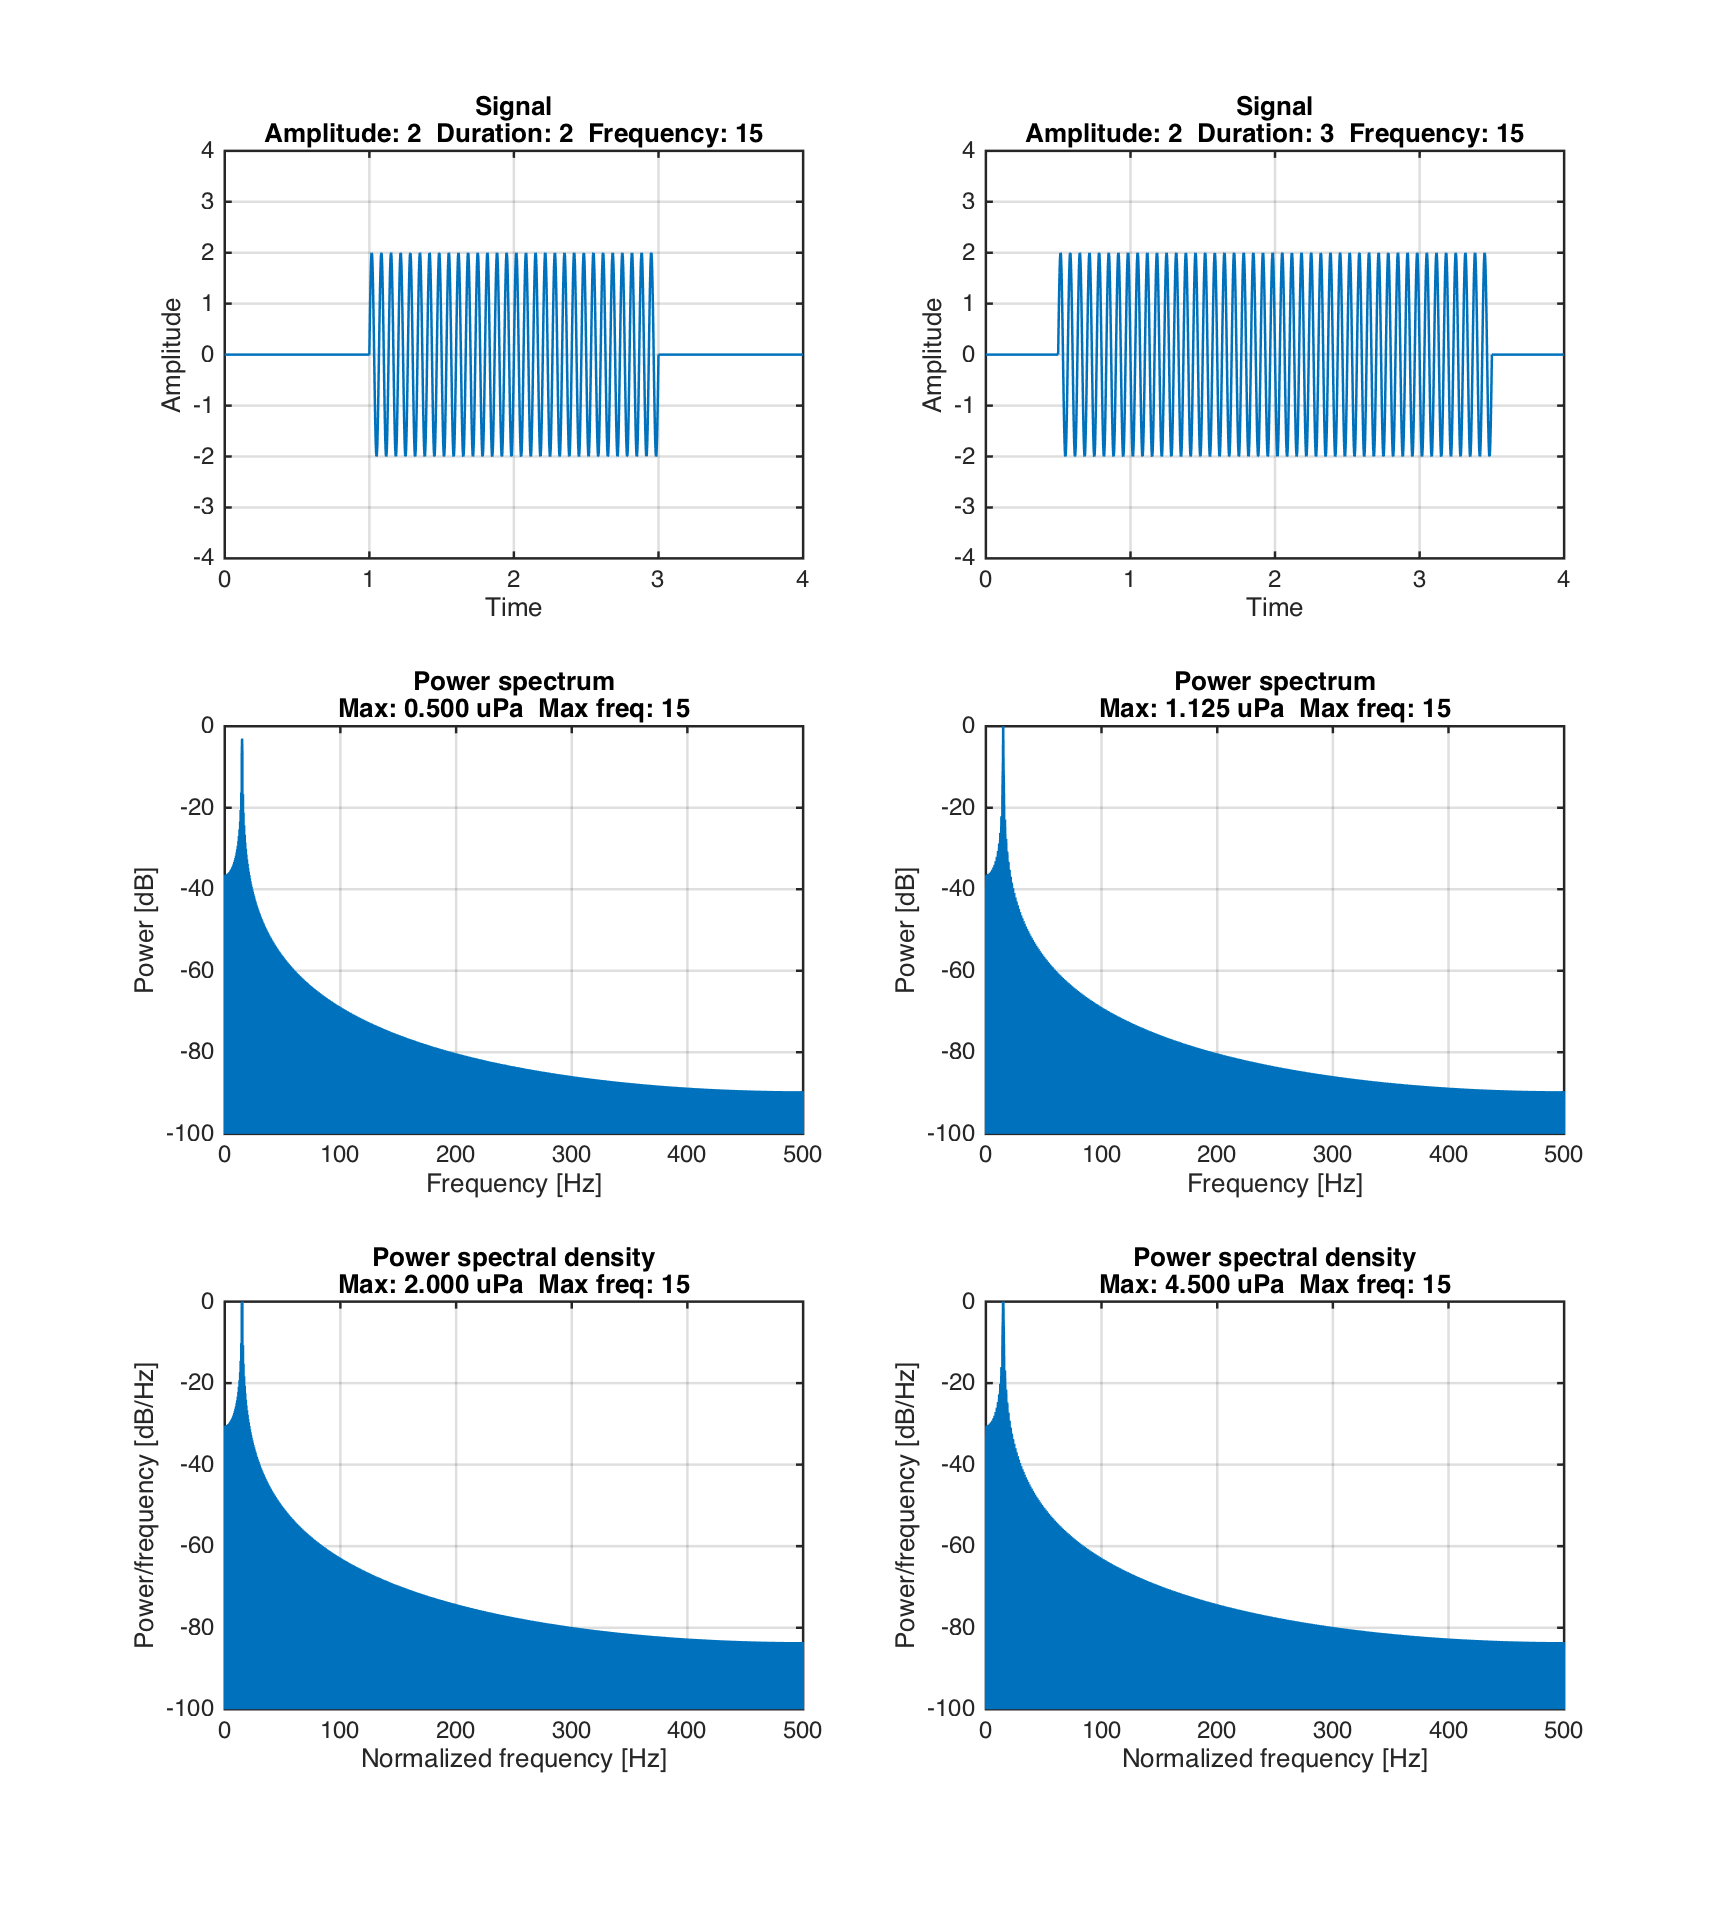

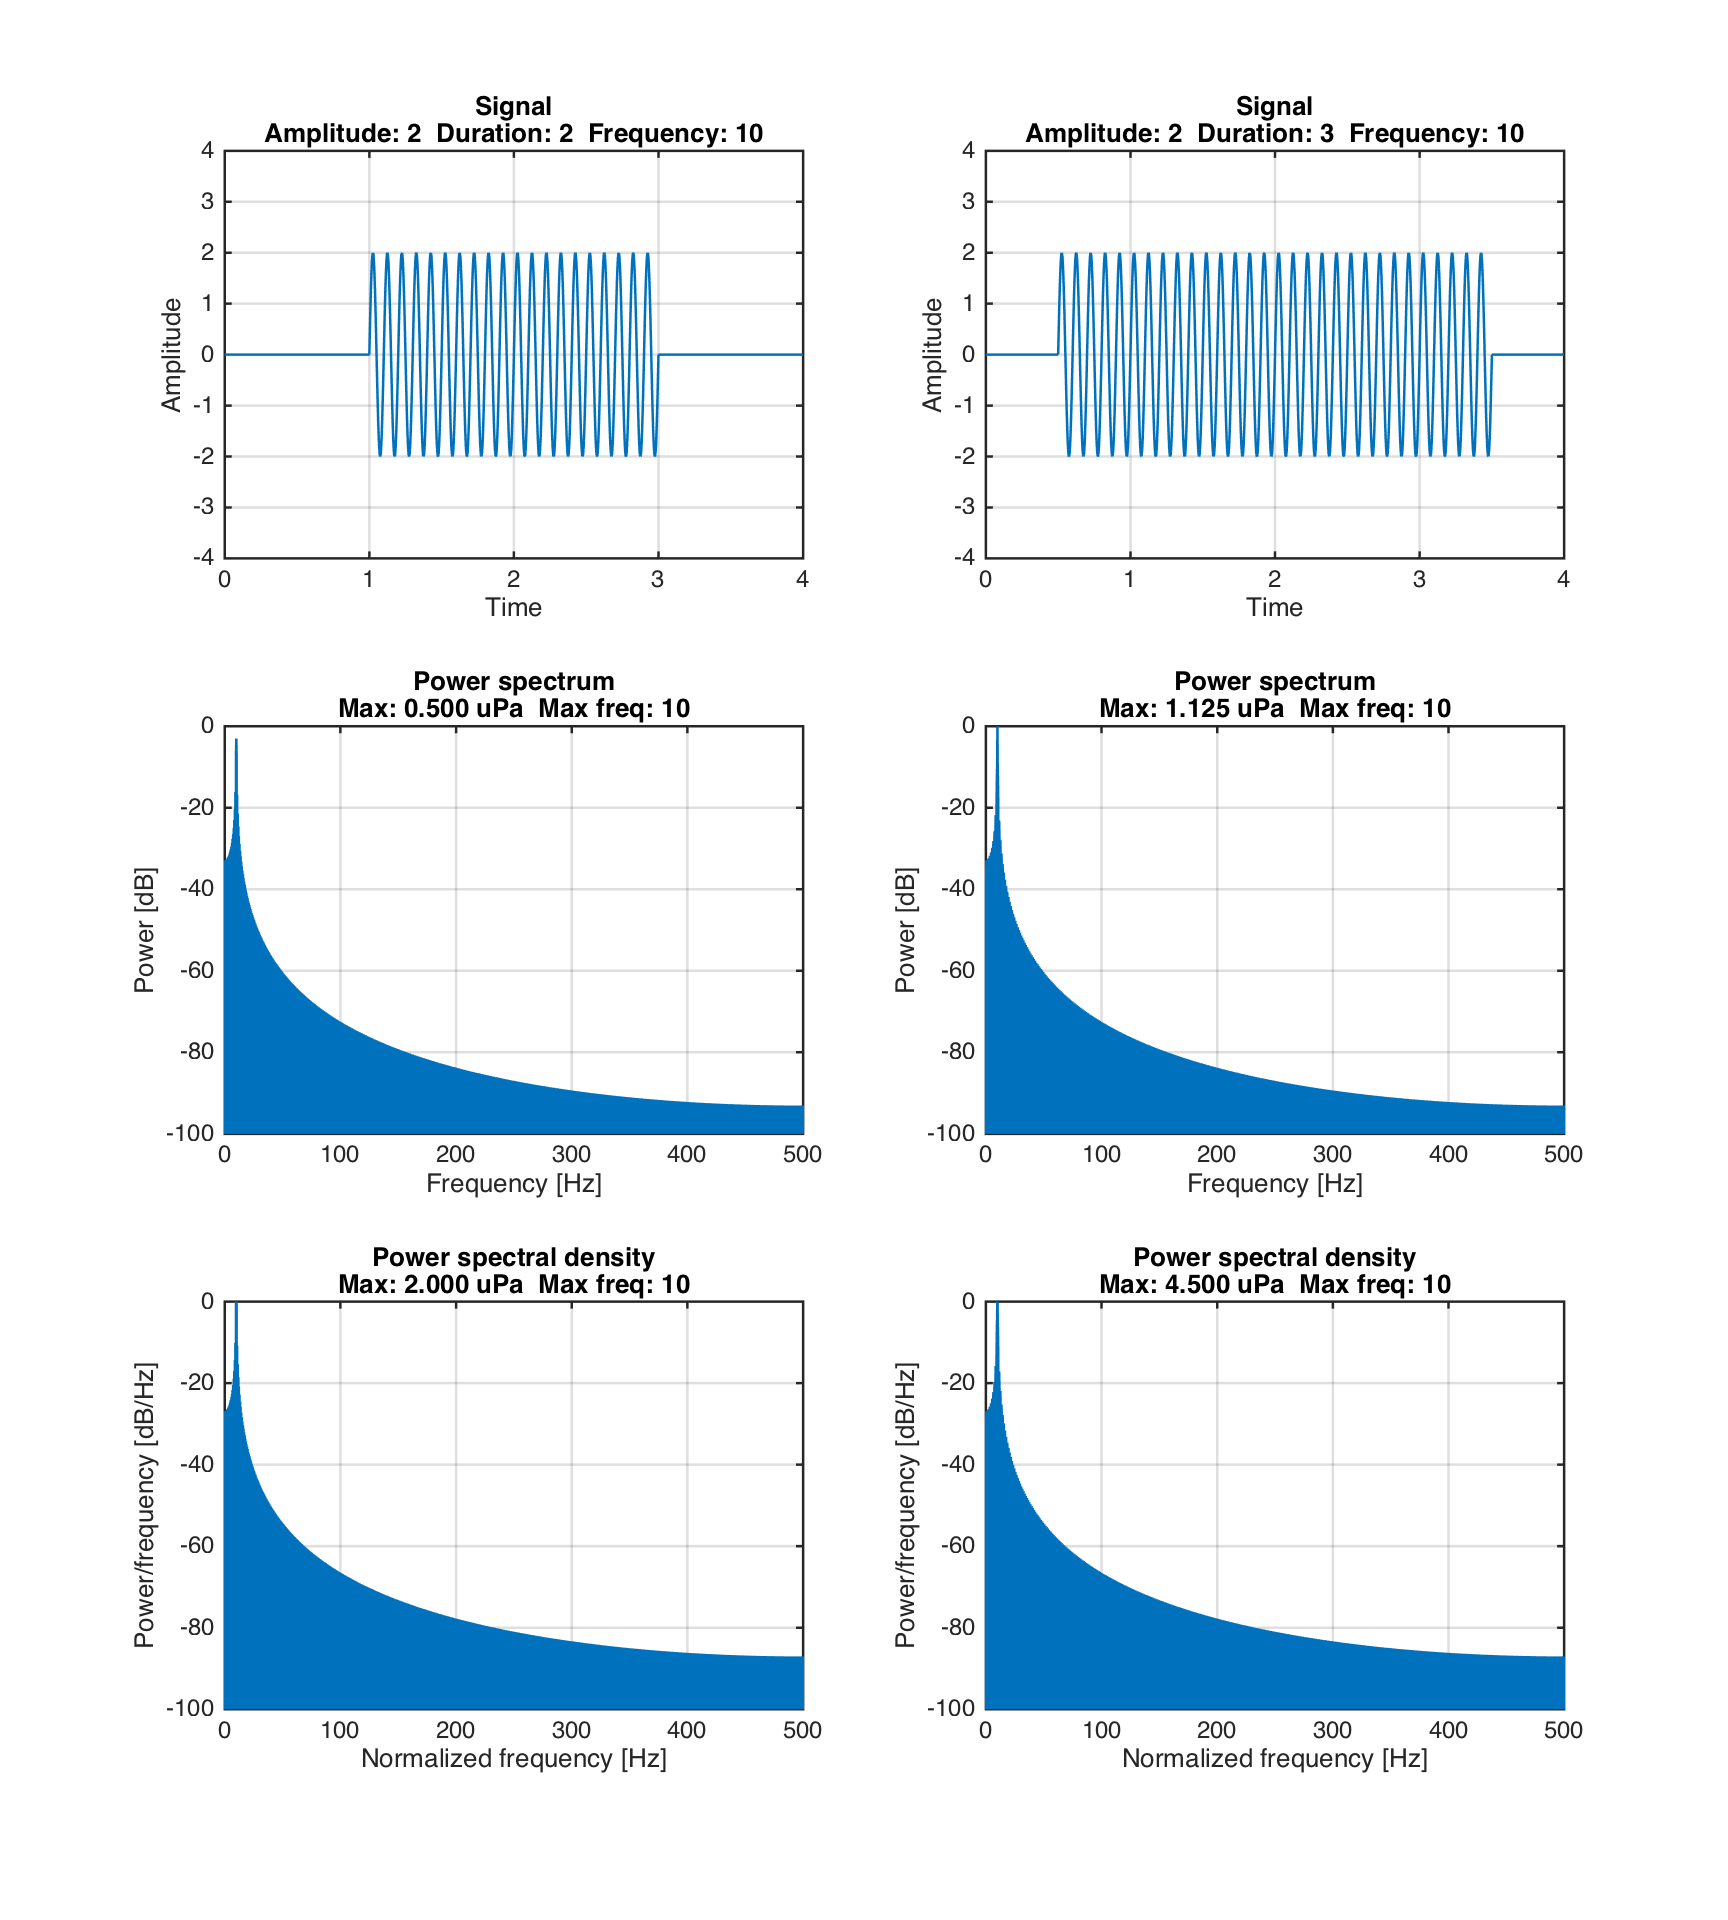

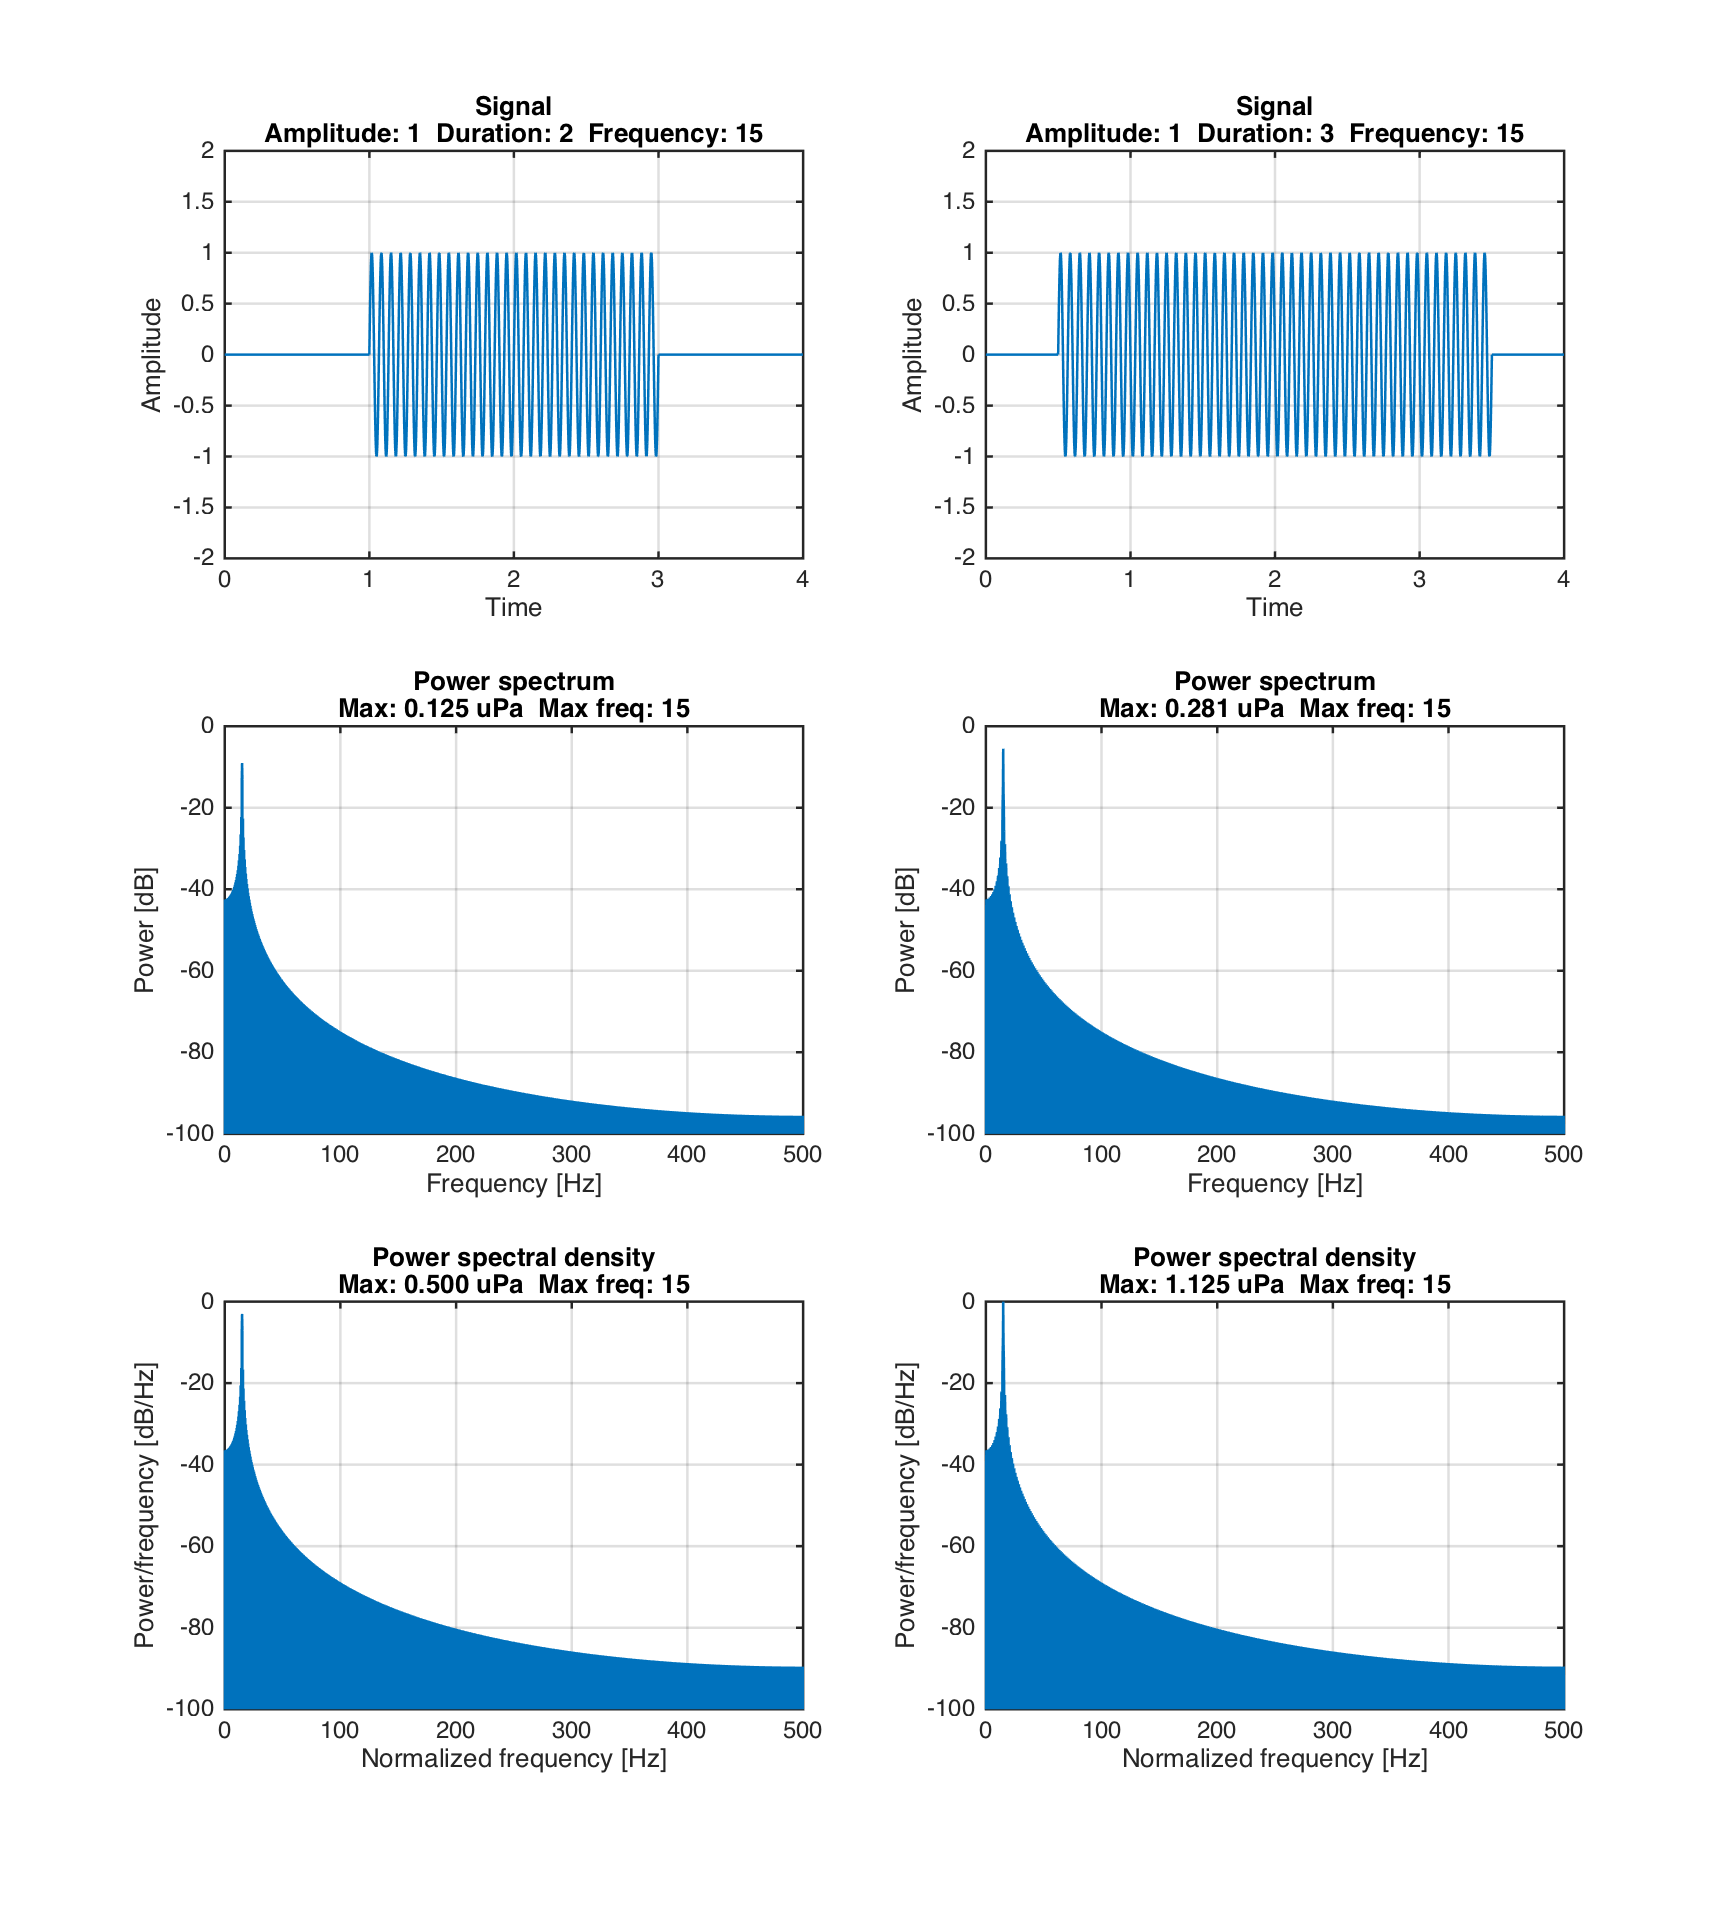

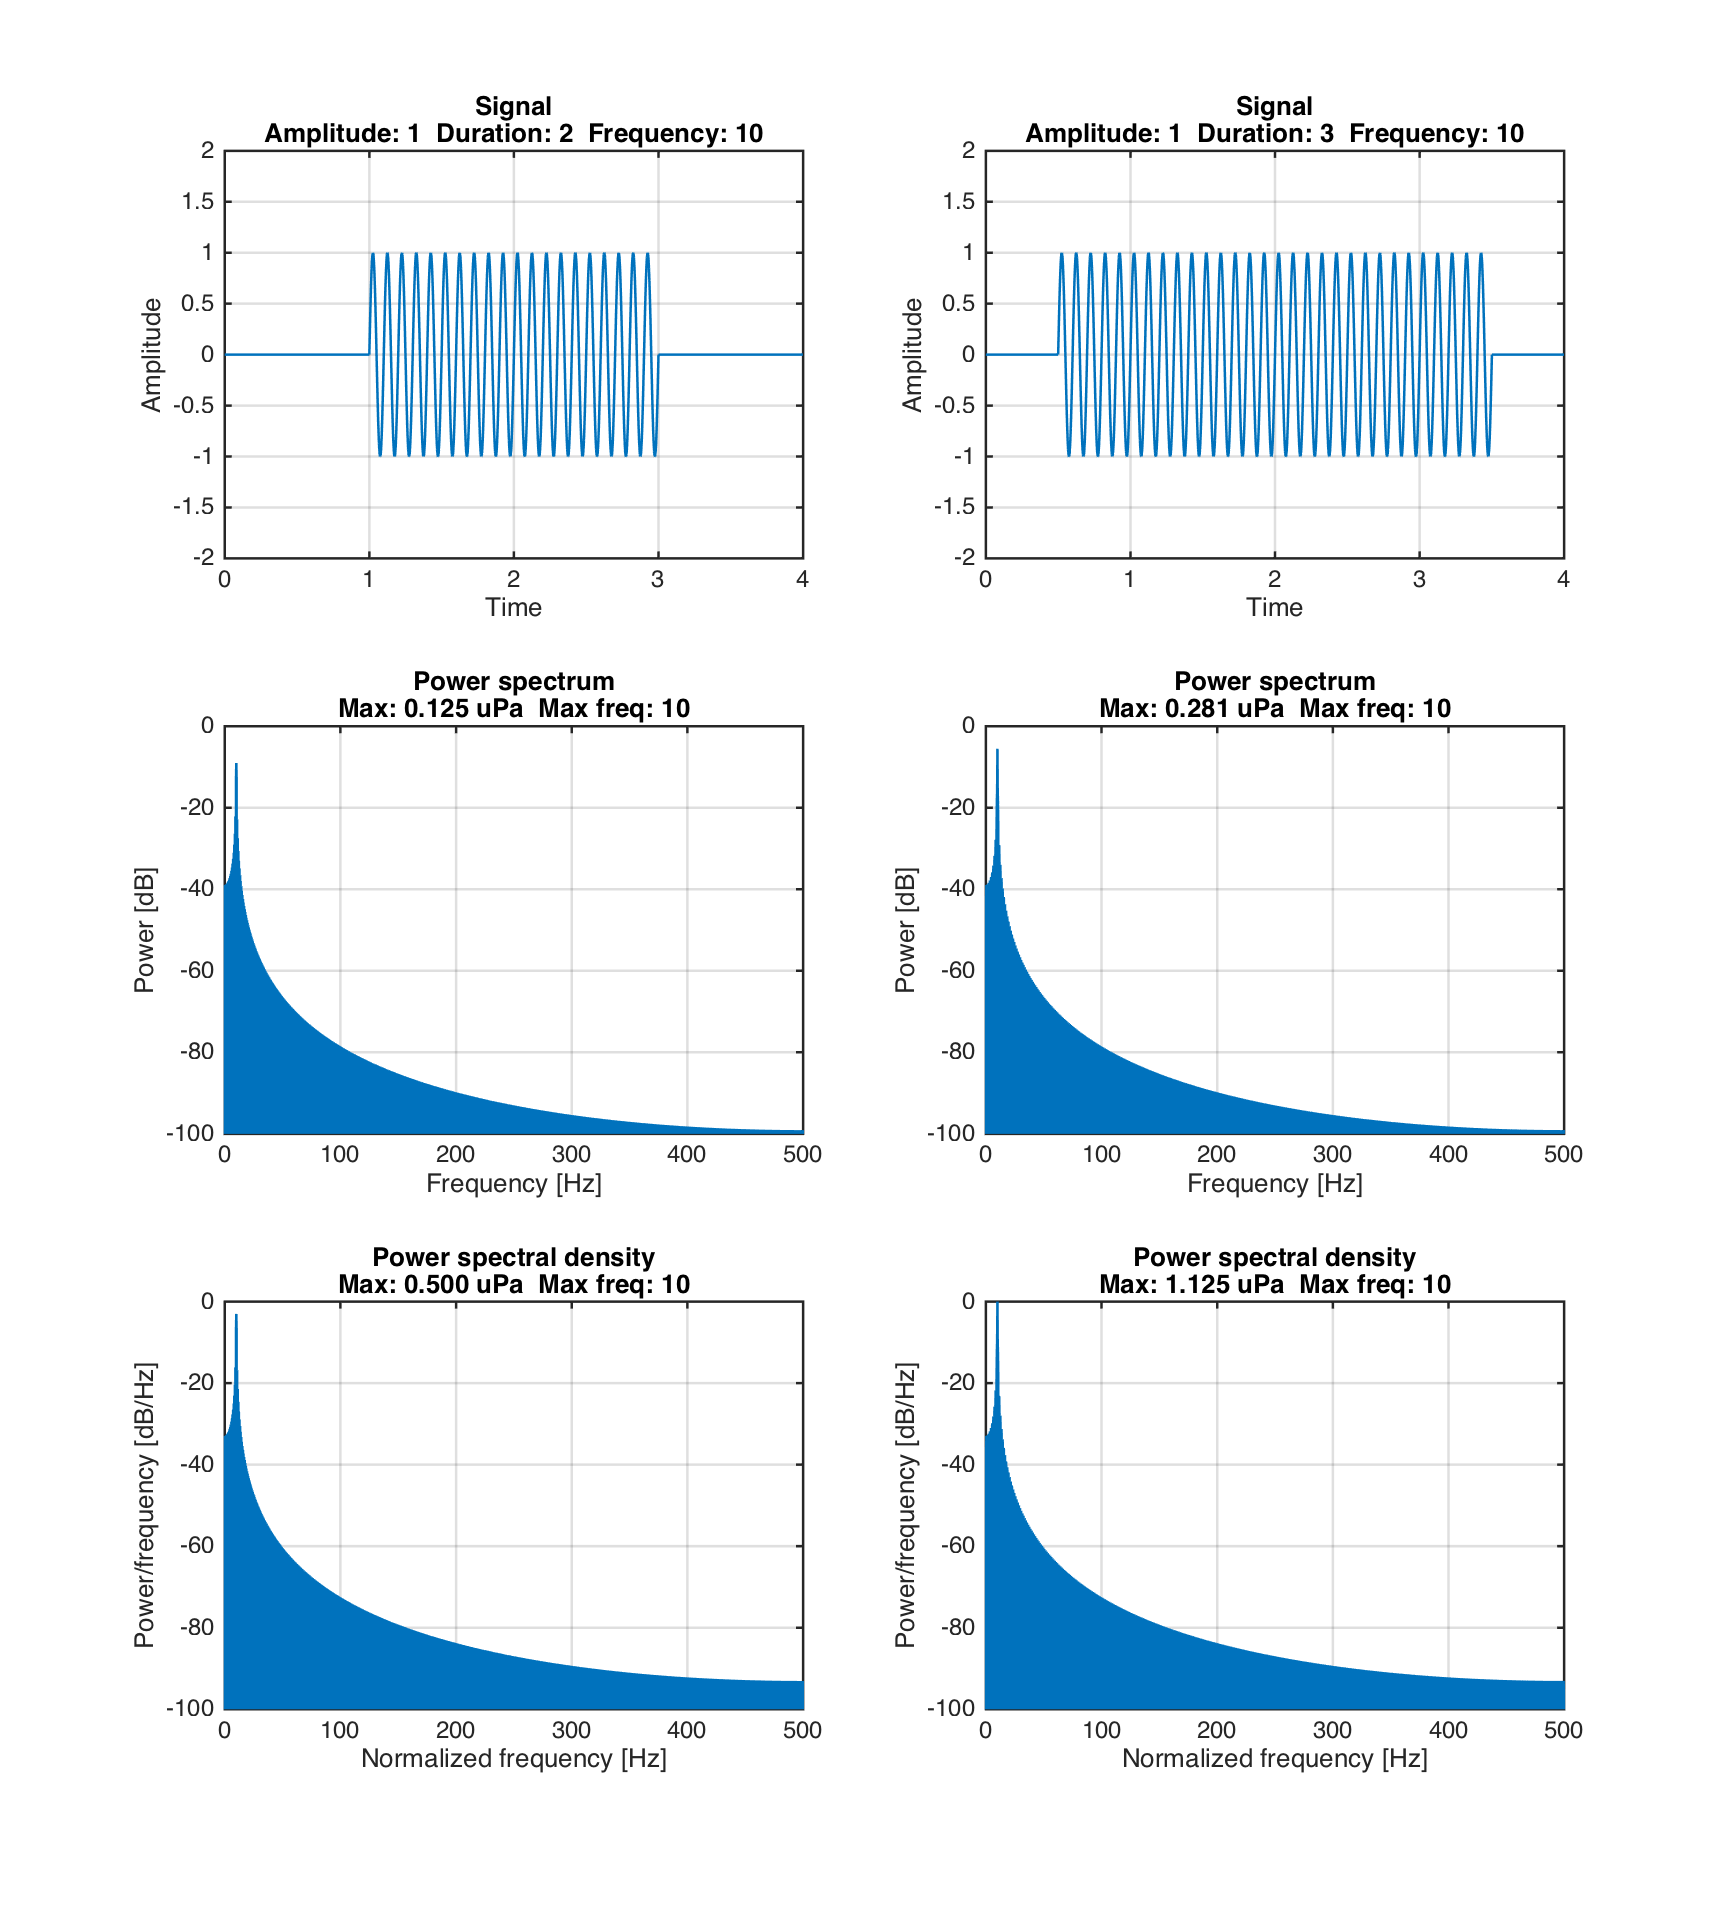

In [4]:
plot_ps_psd('sine',a,f,d,Fs,D);

### Pulse

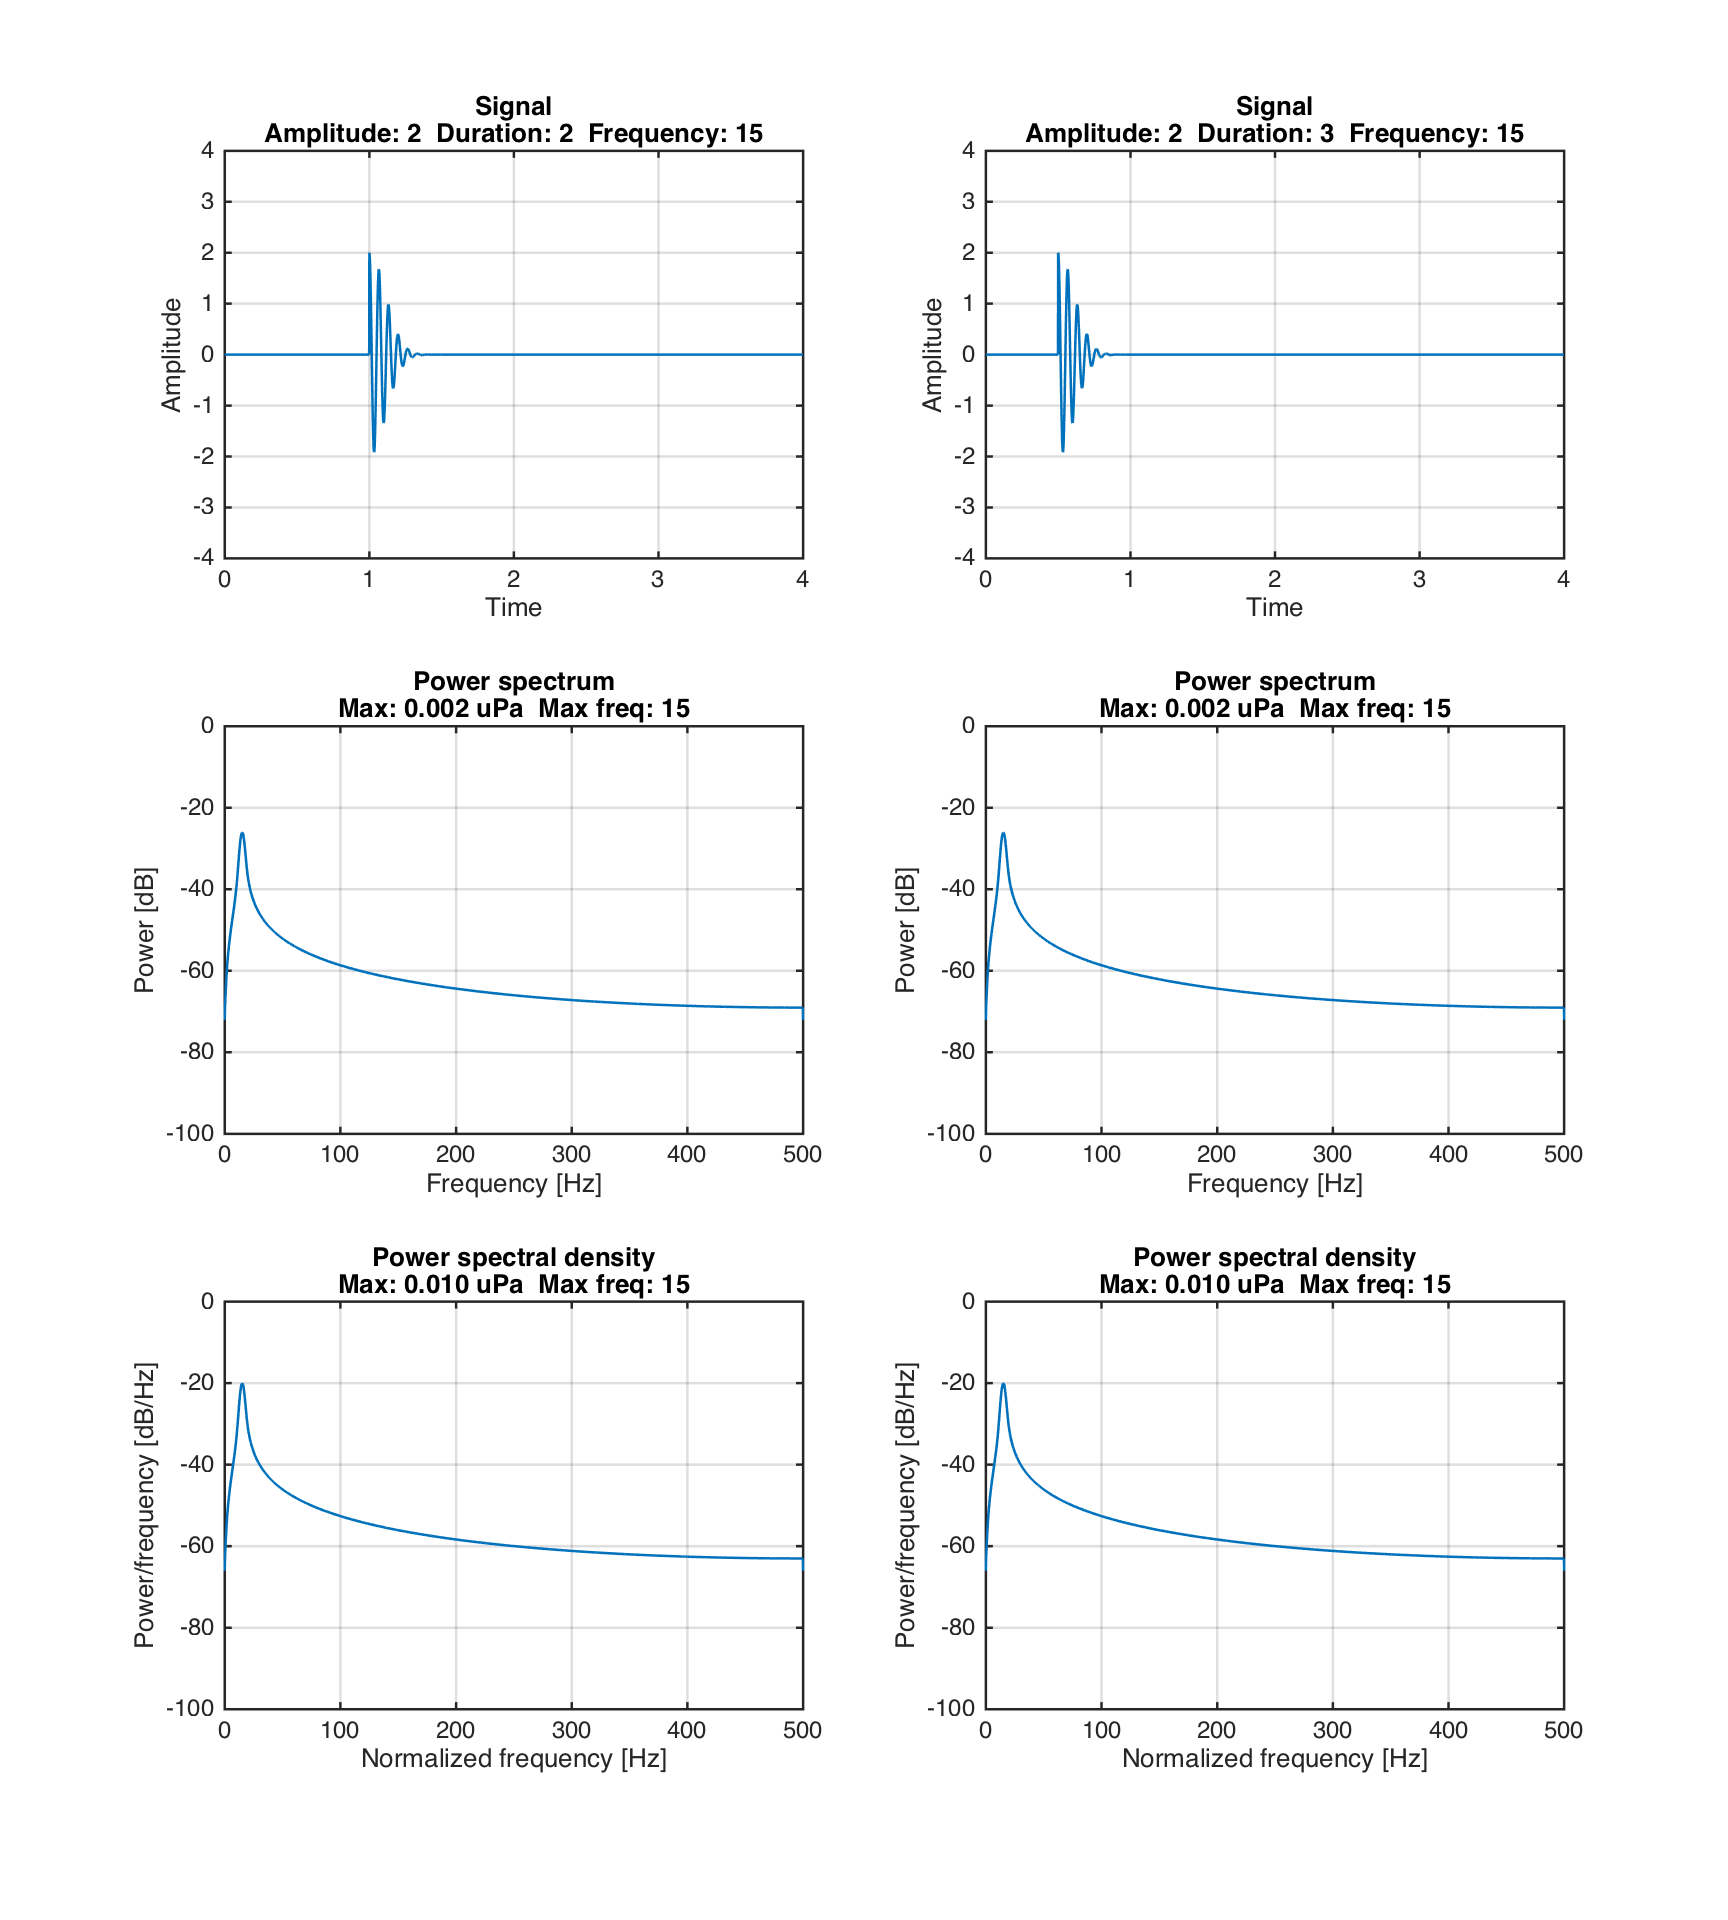

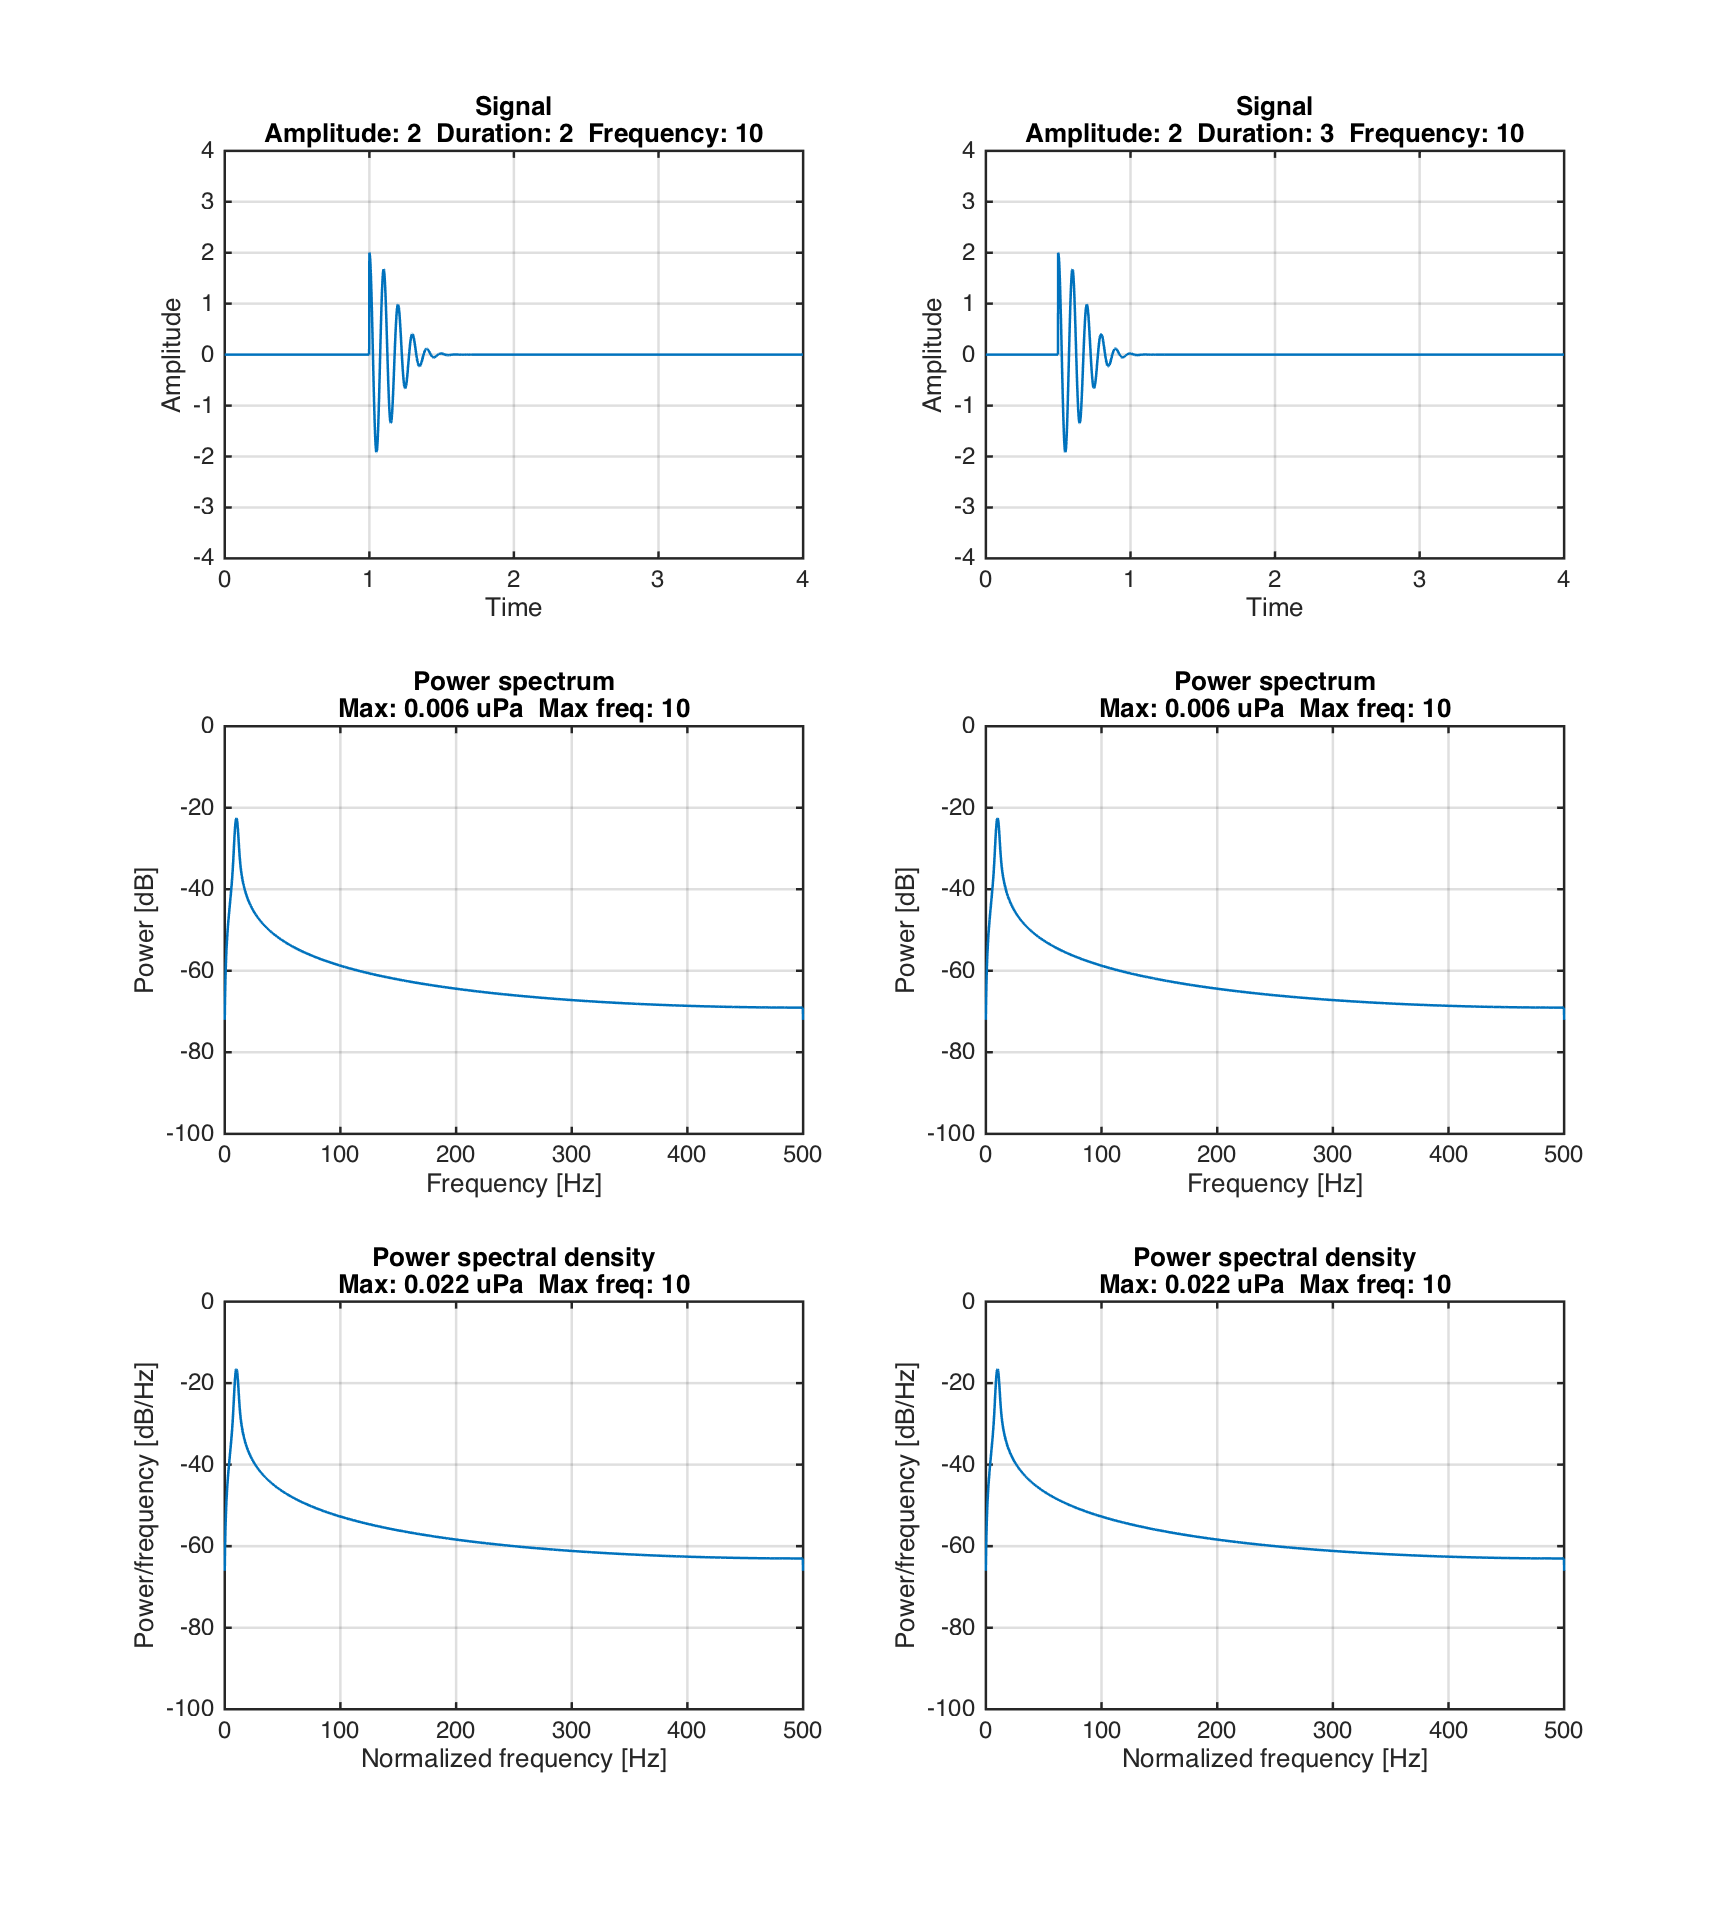

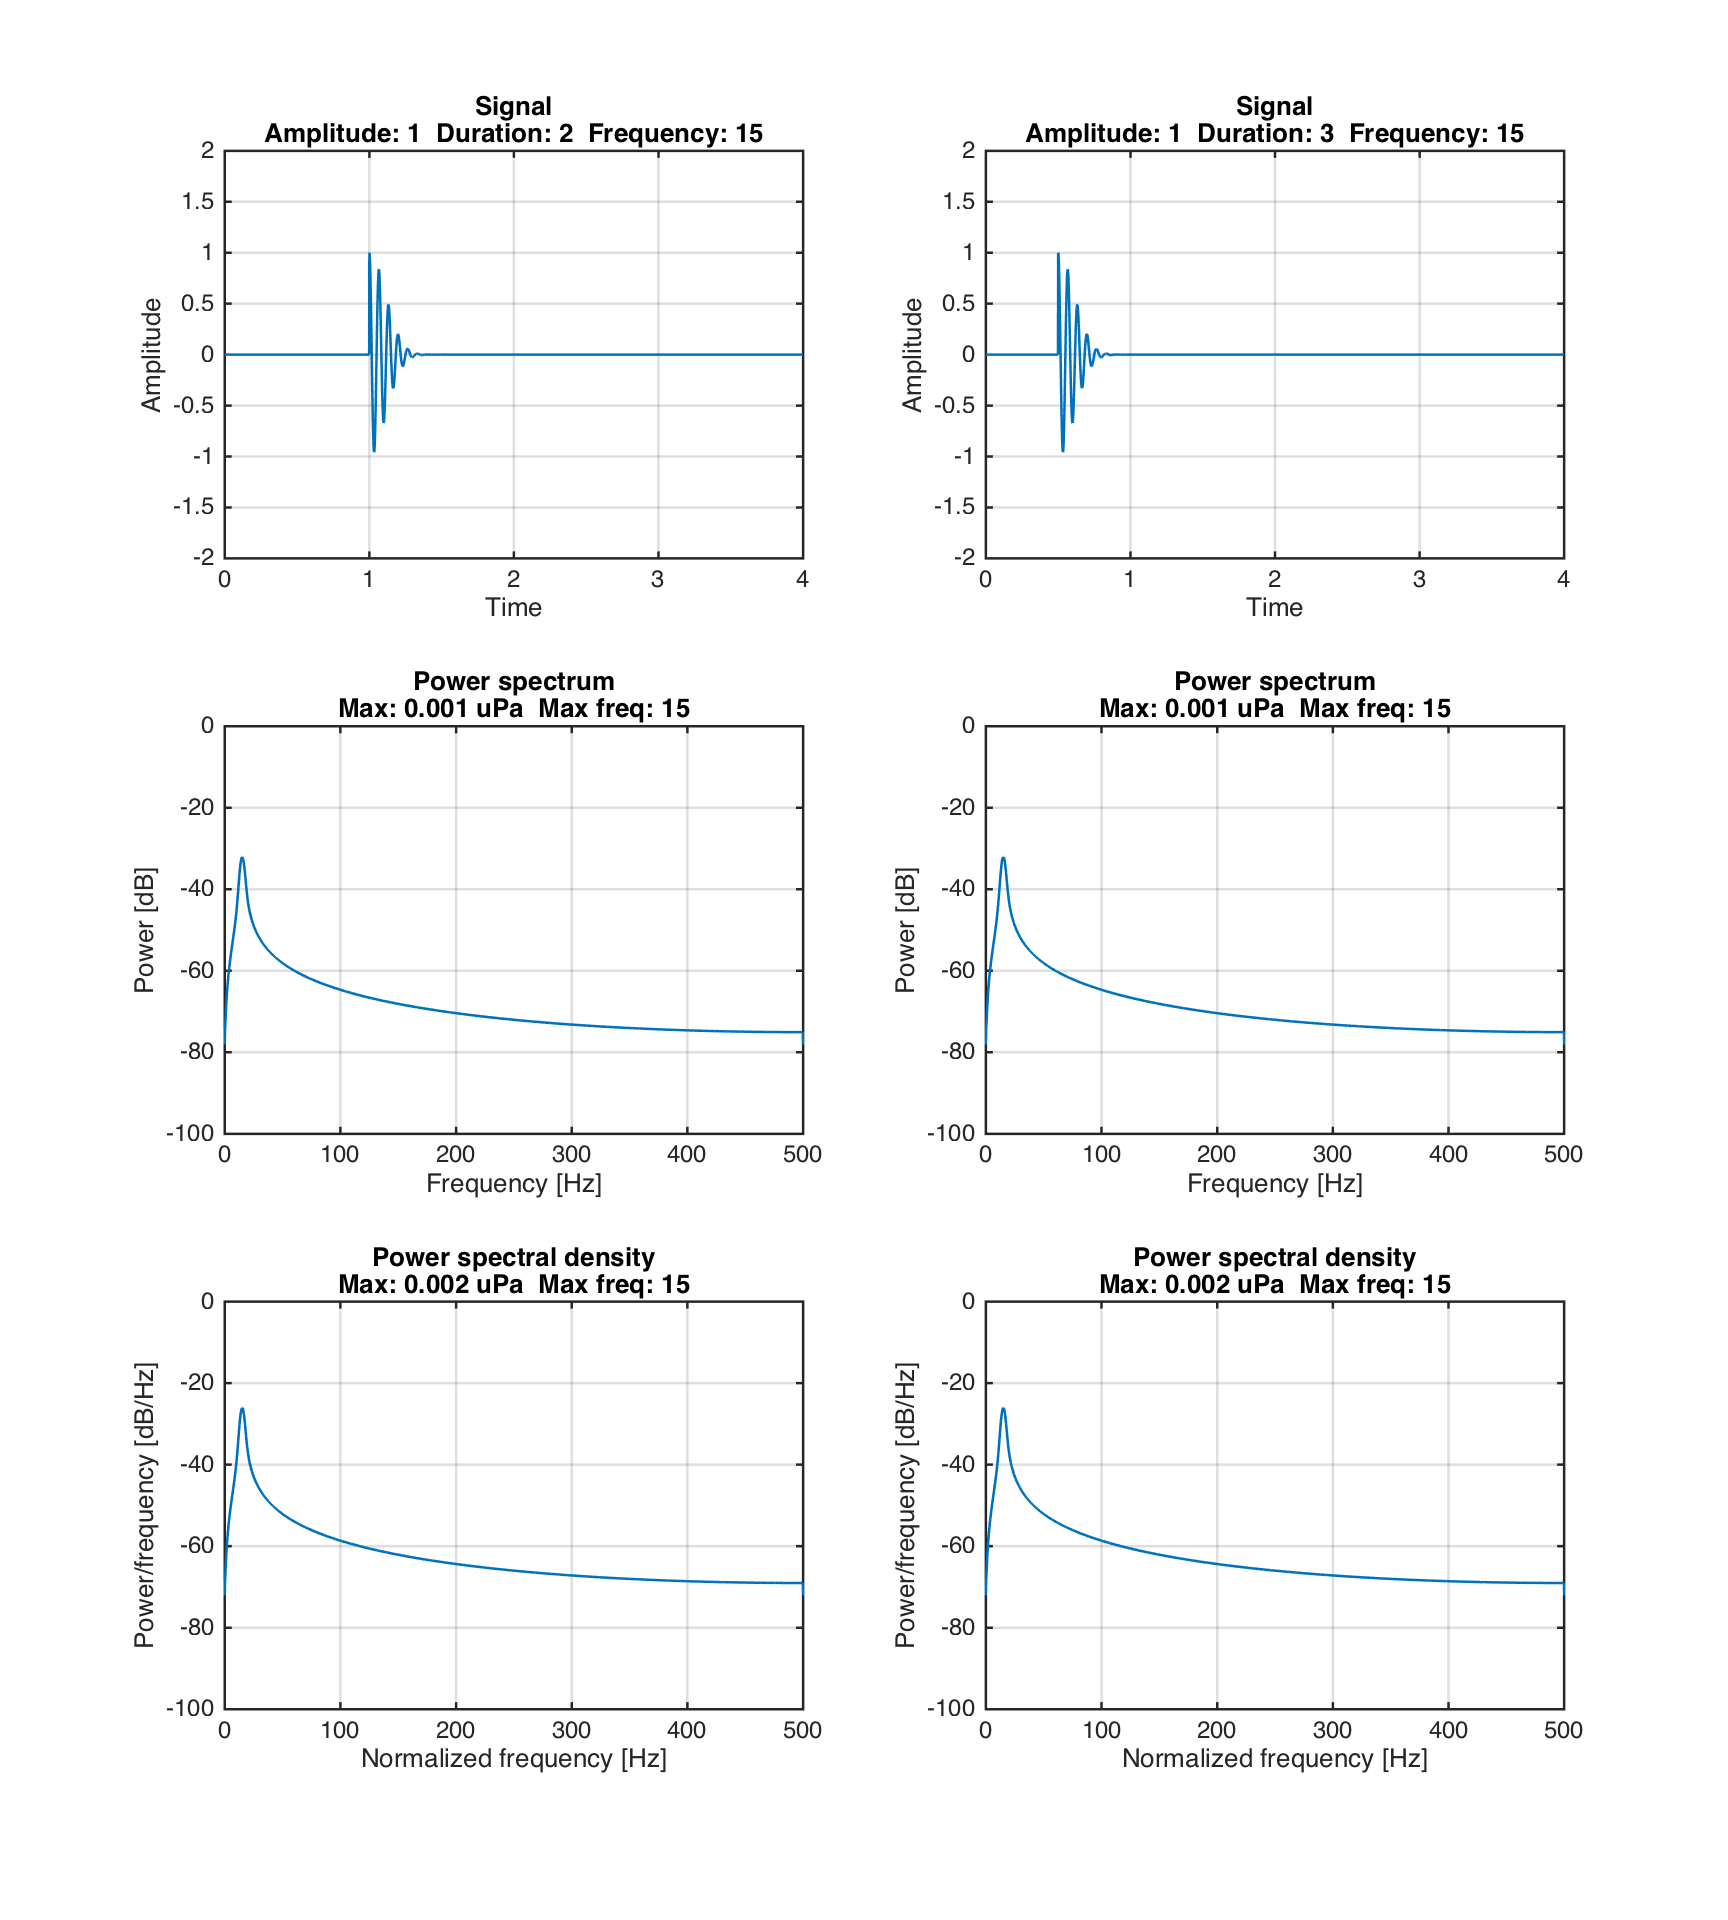

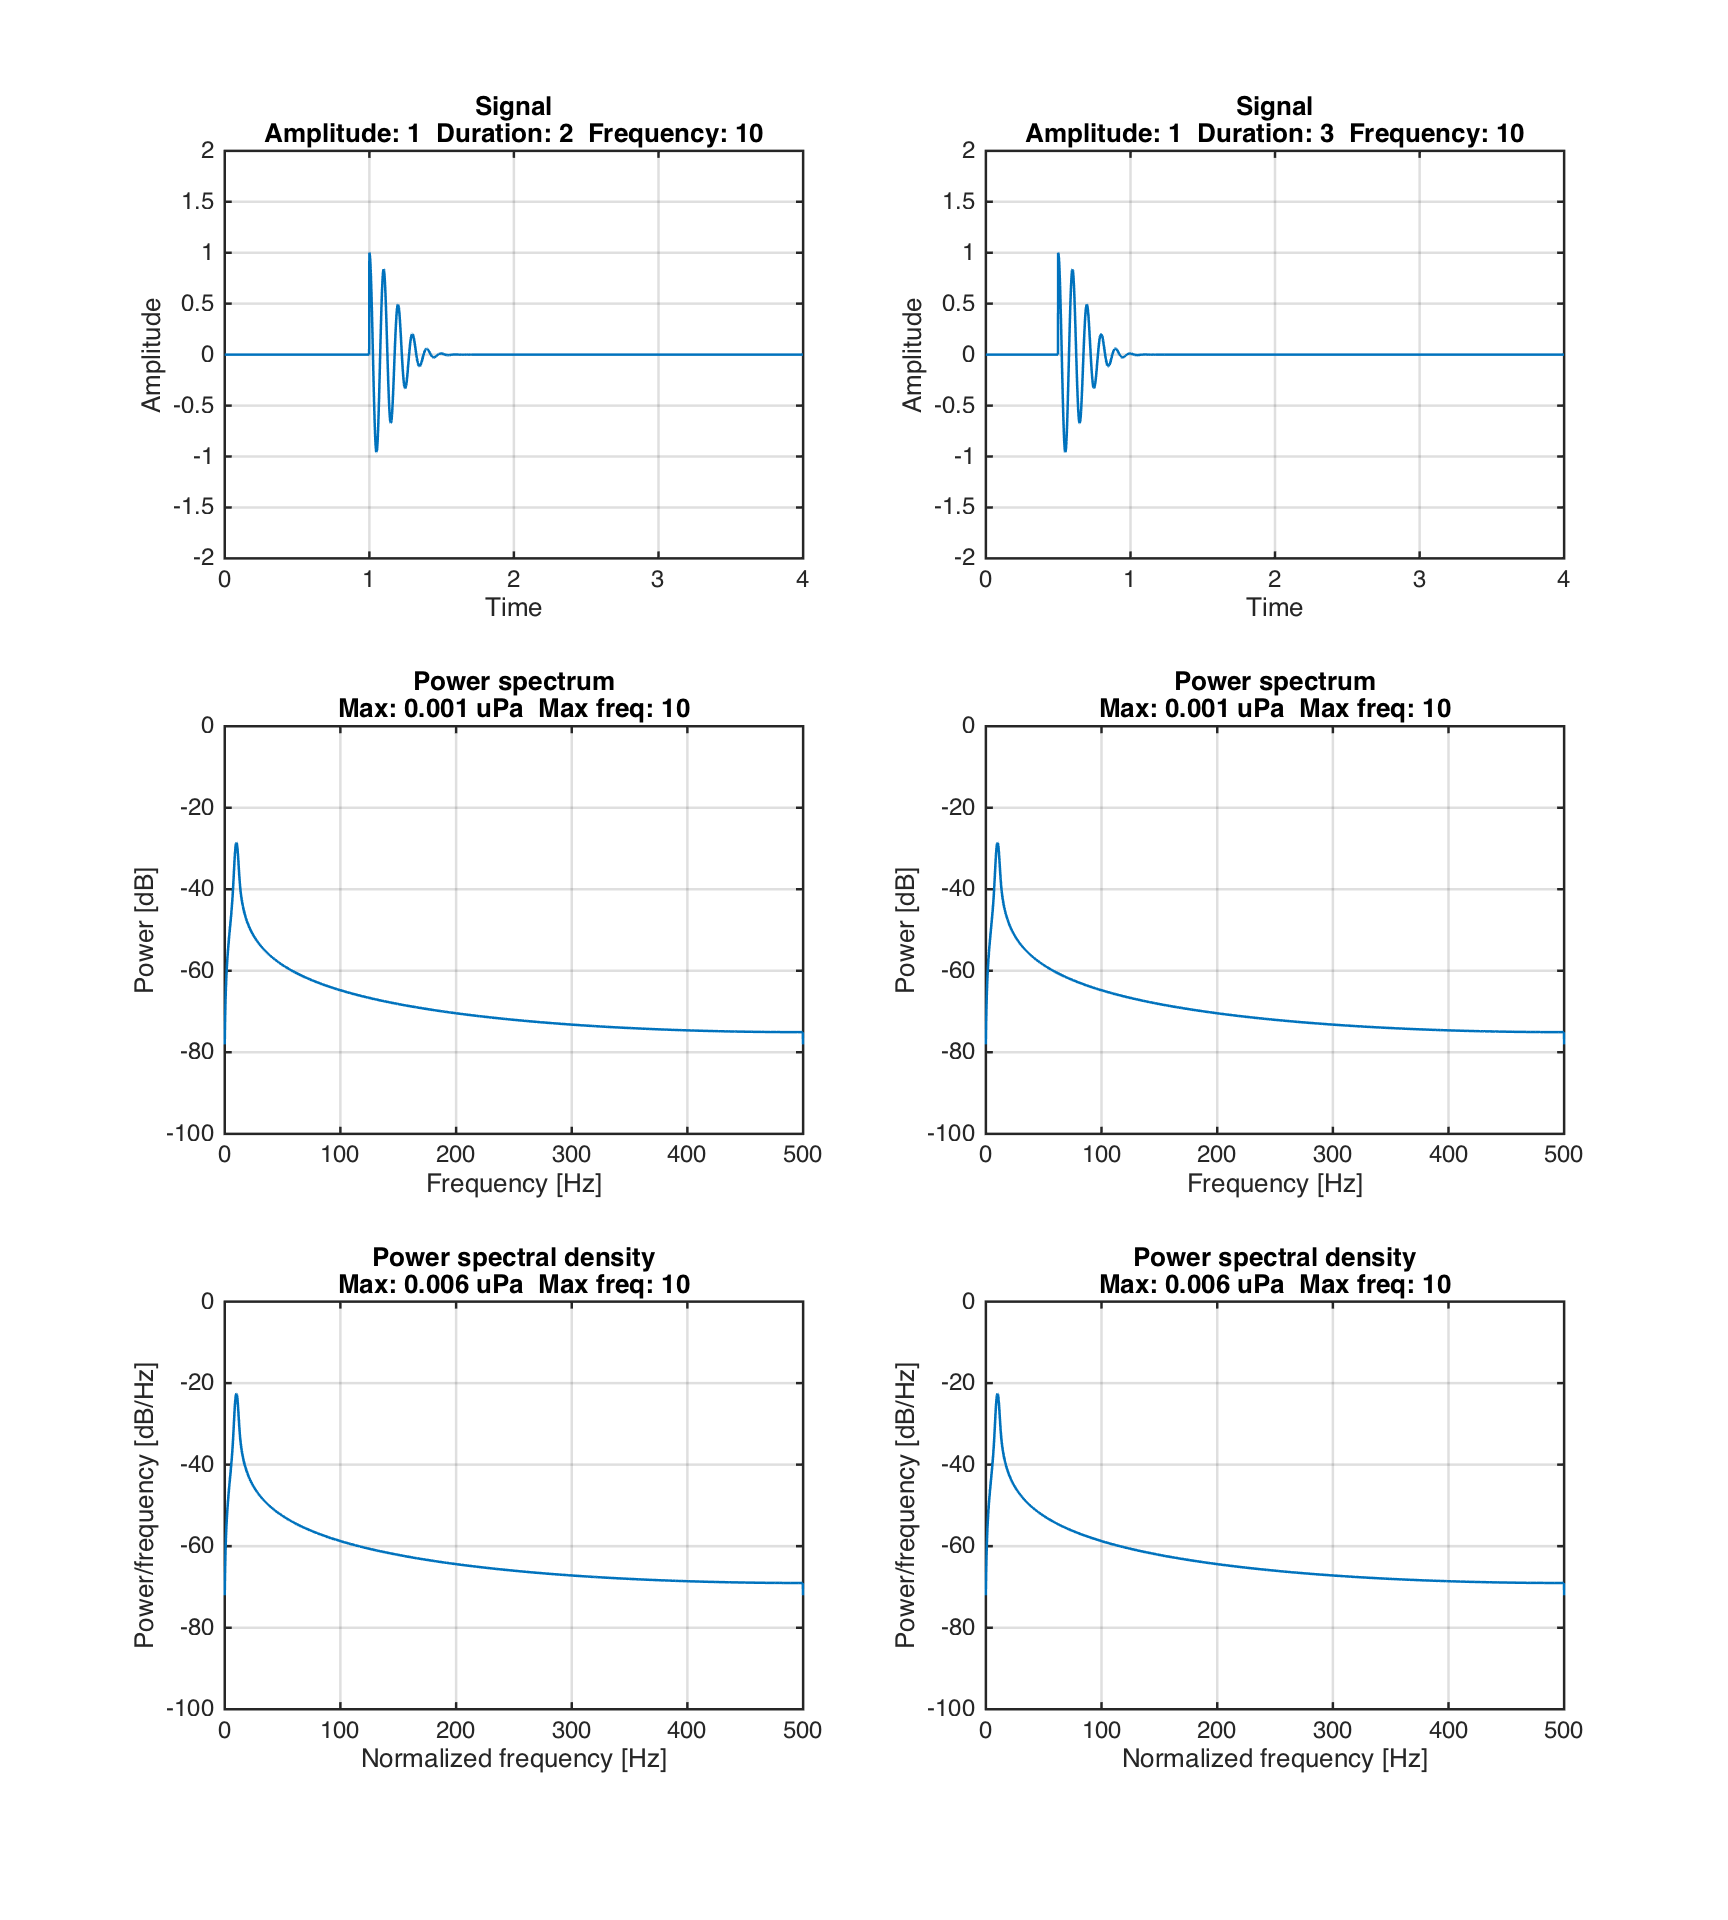

In [5]:
plot_ps_psd('pulse',a,f,d,Fs,D);

### Pulse train

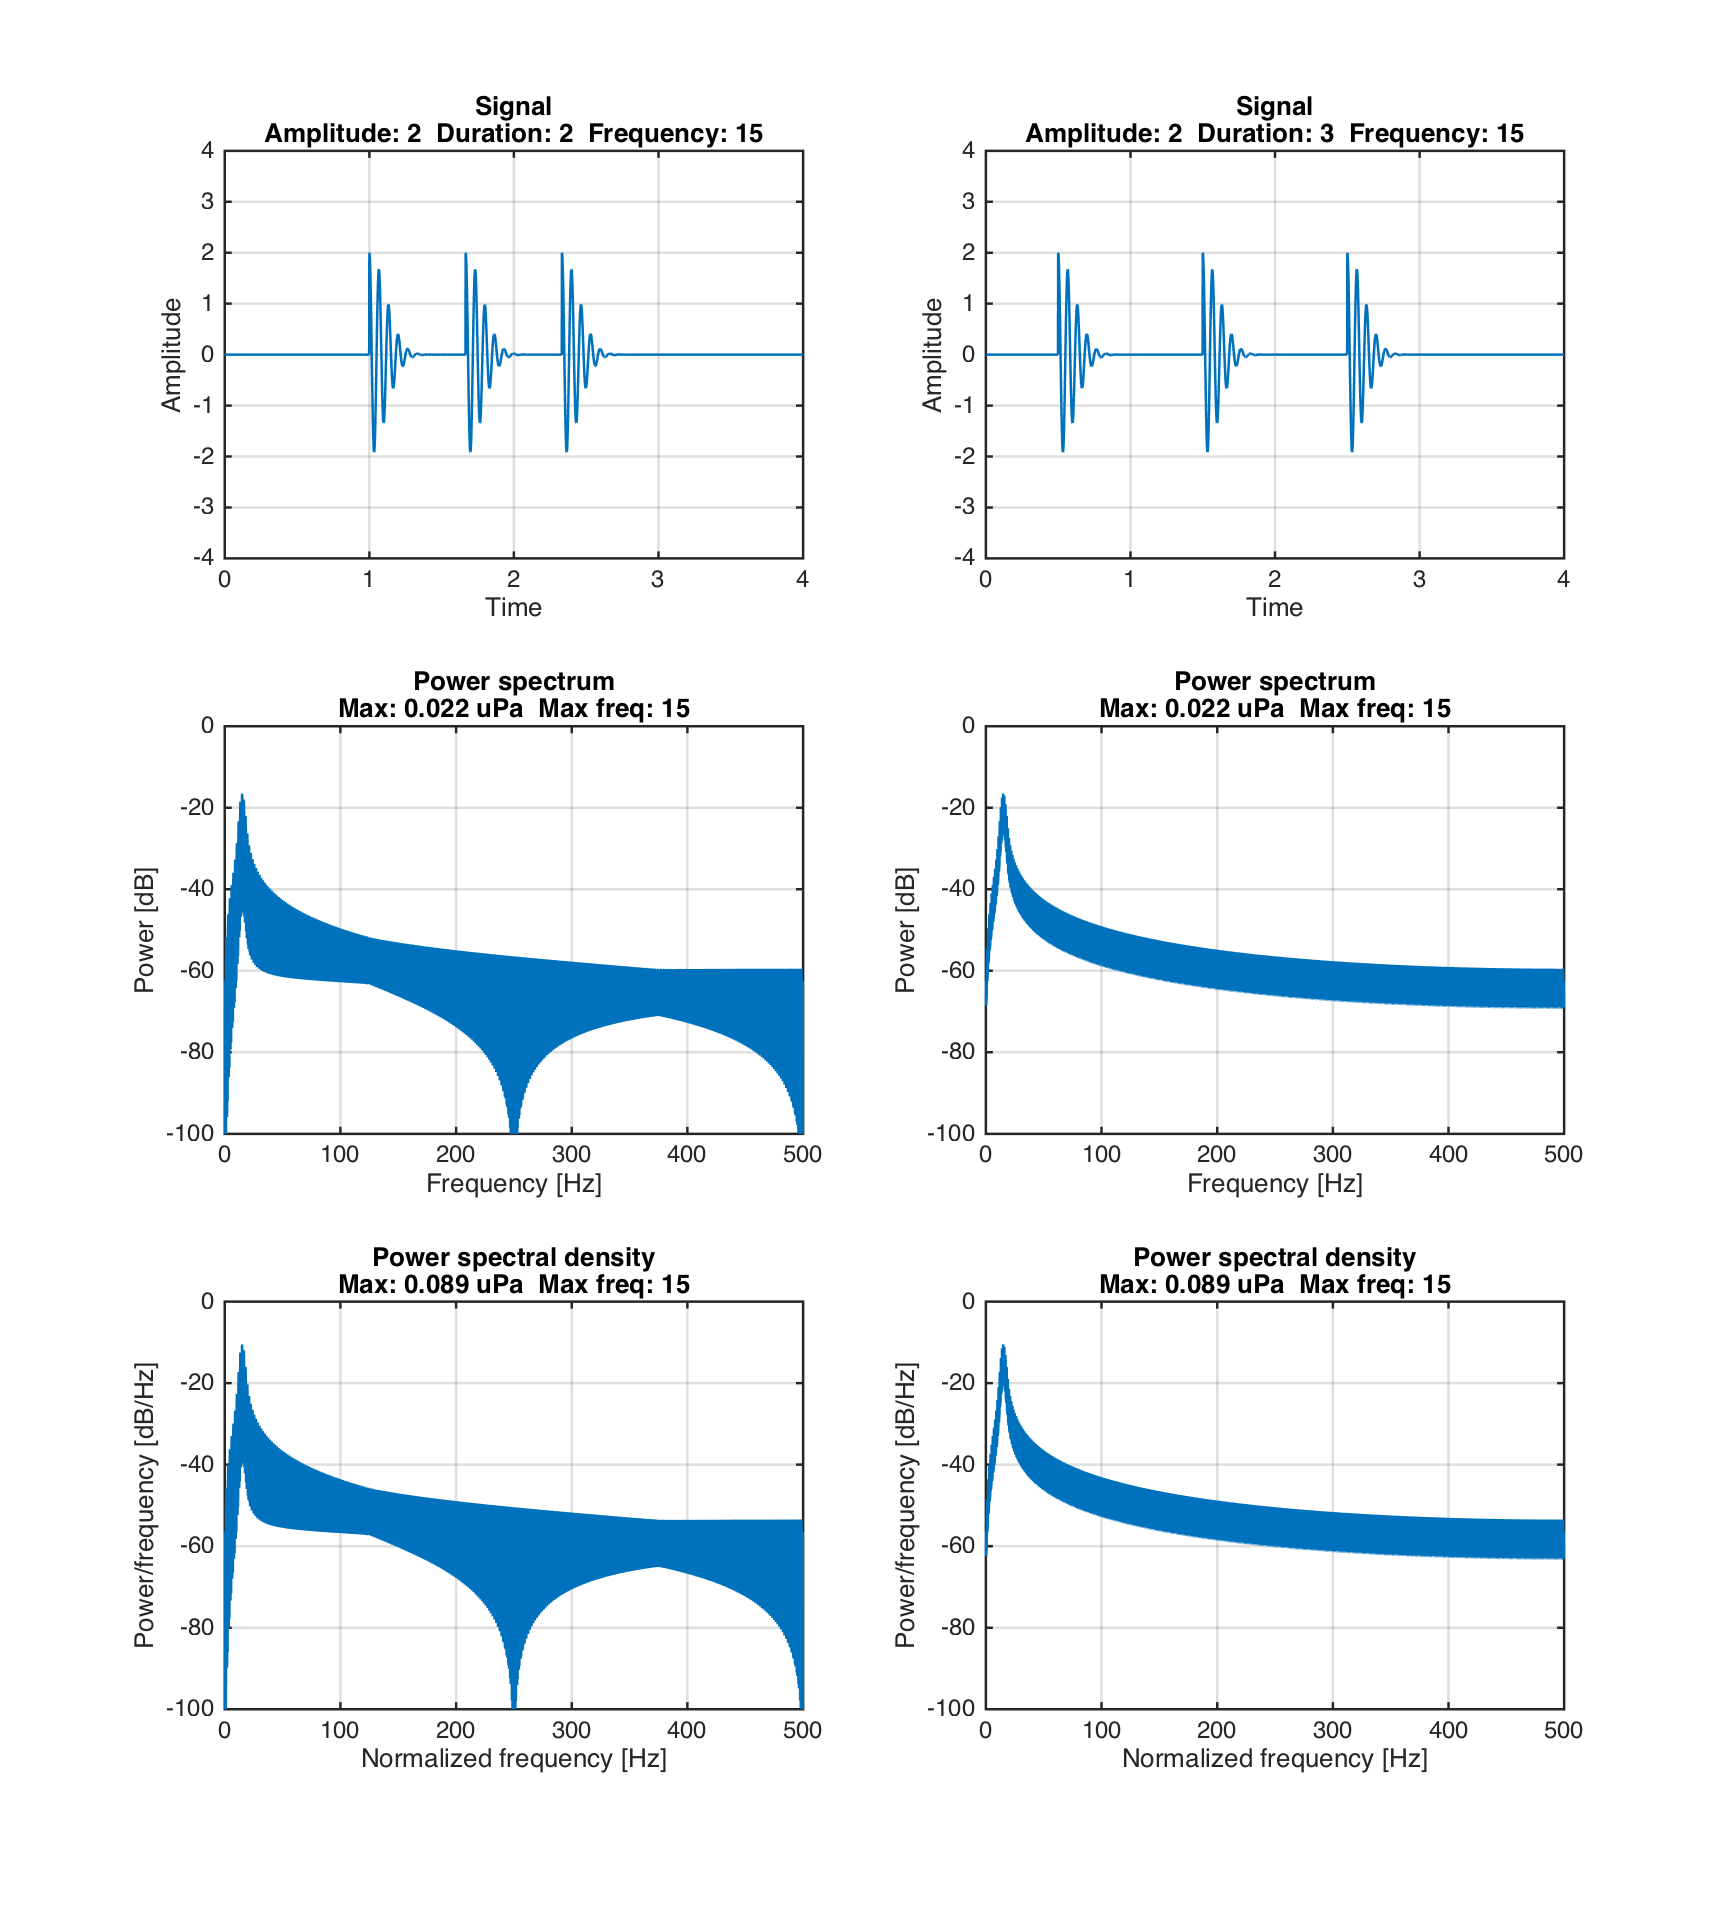

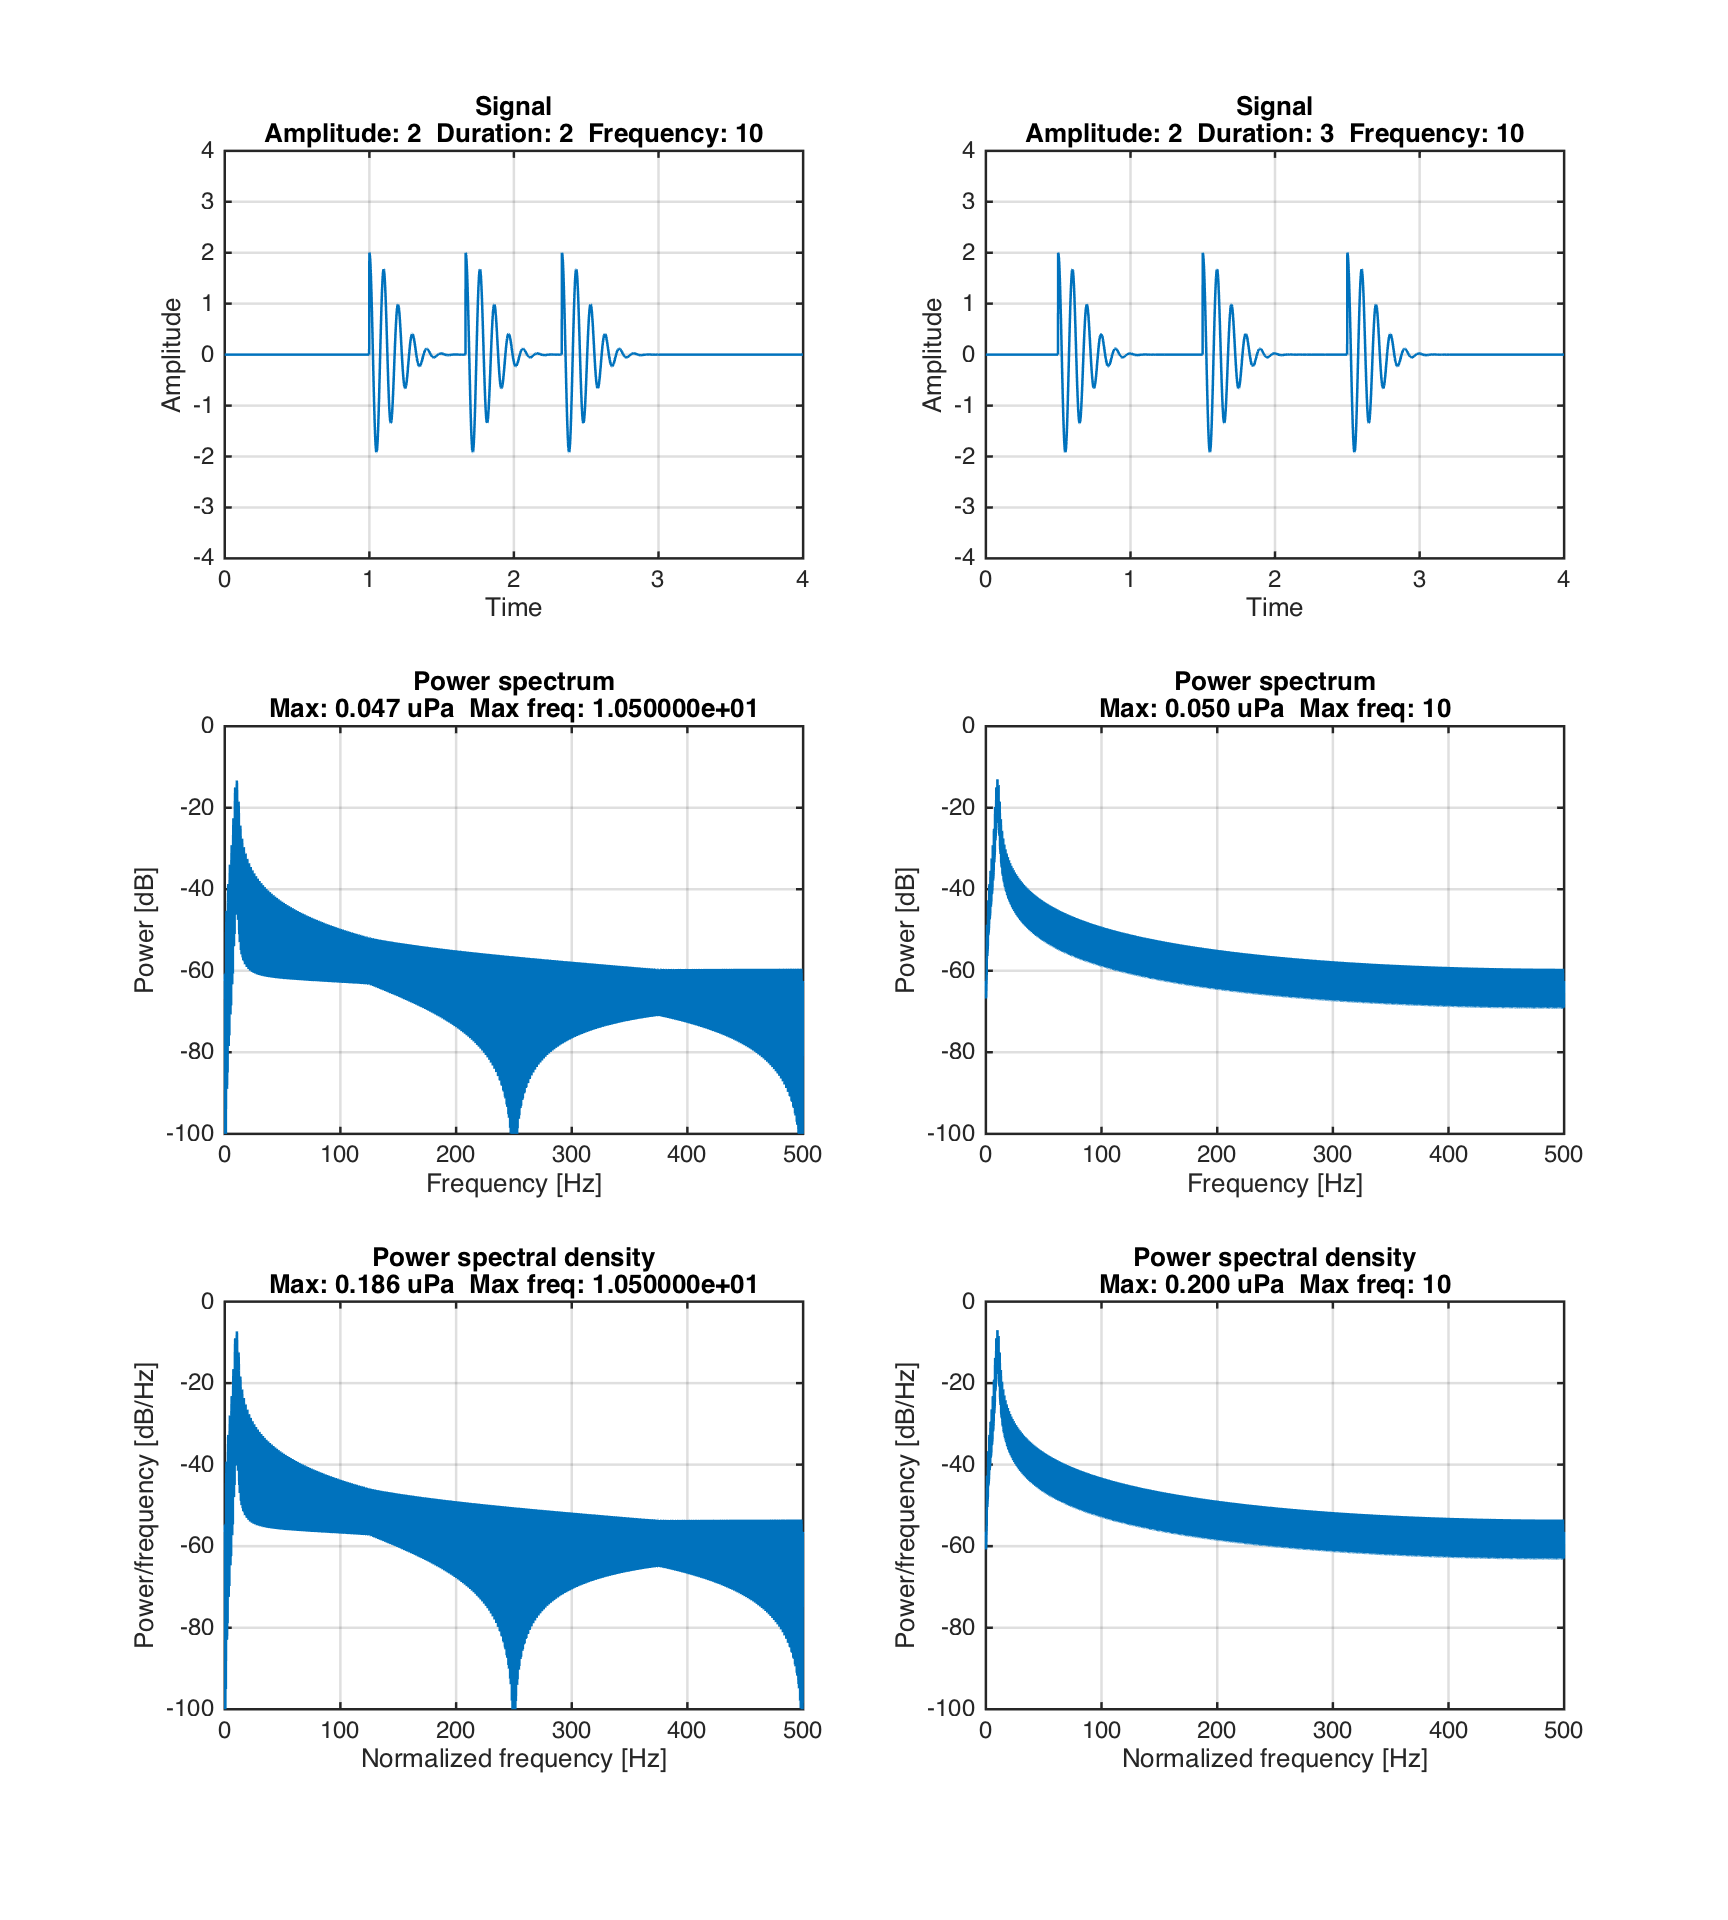

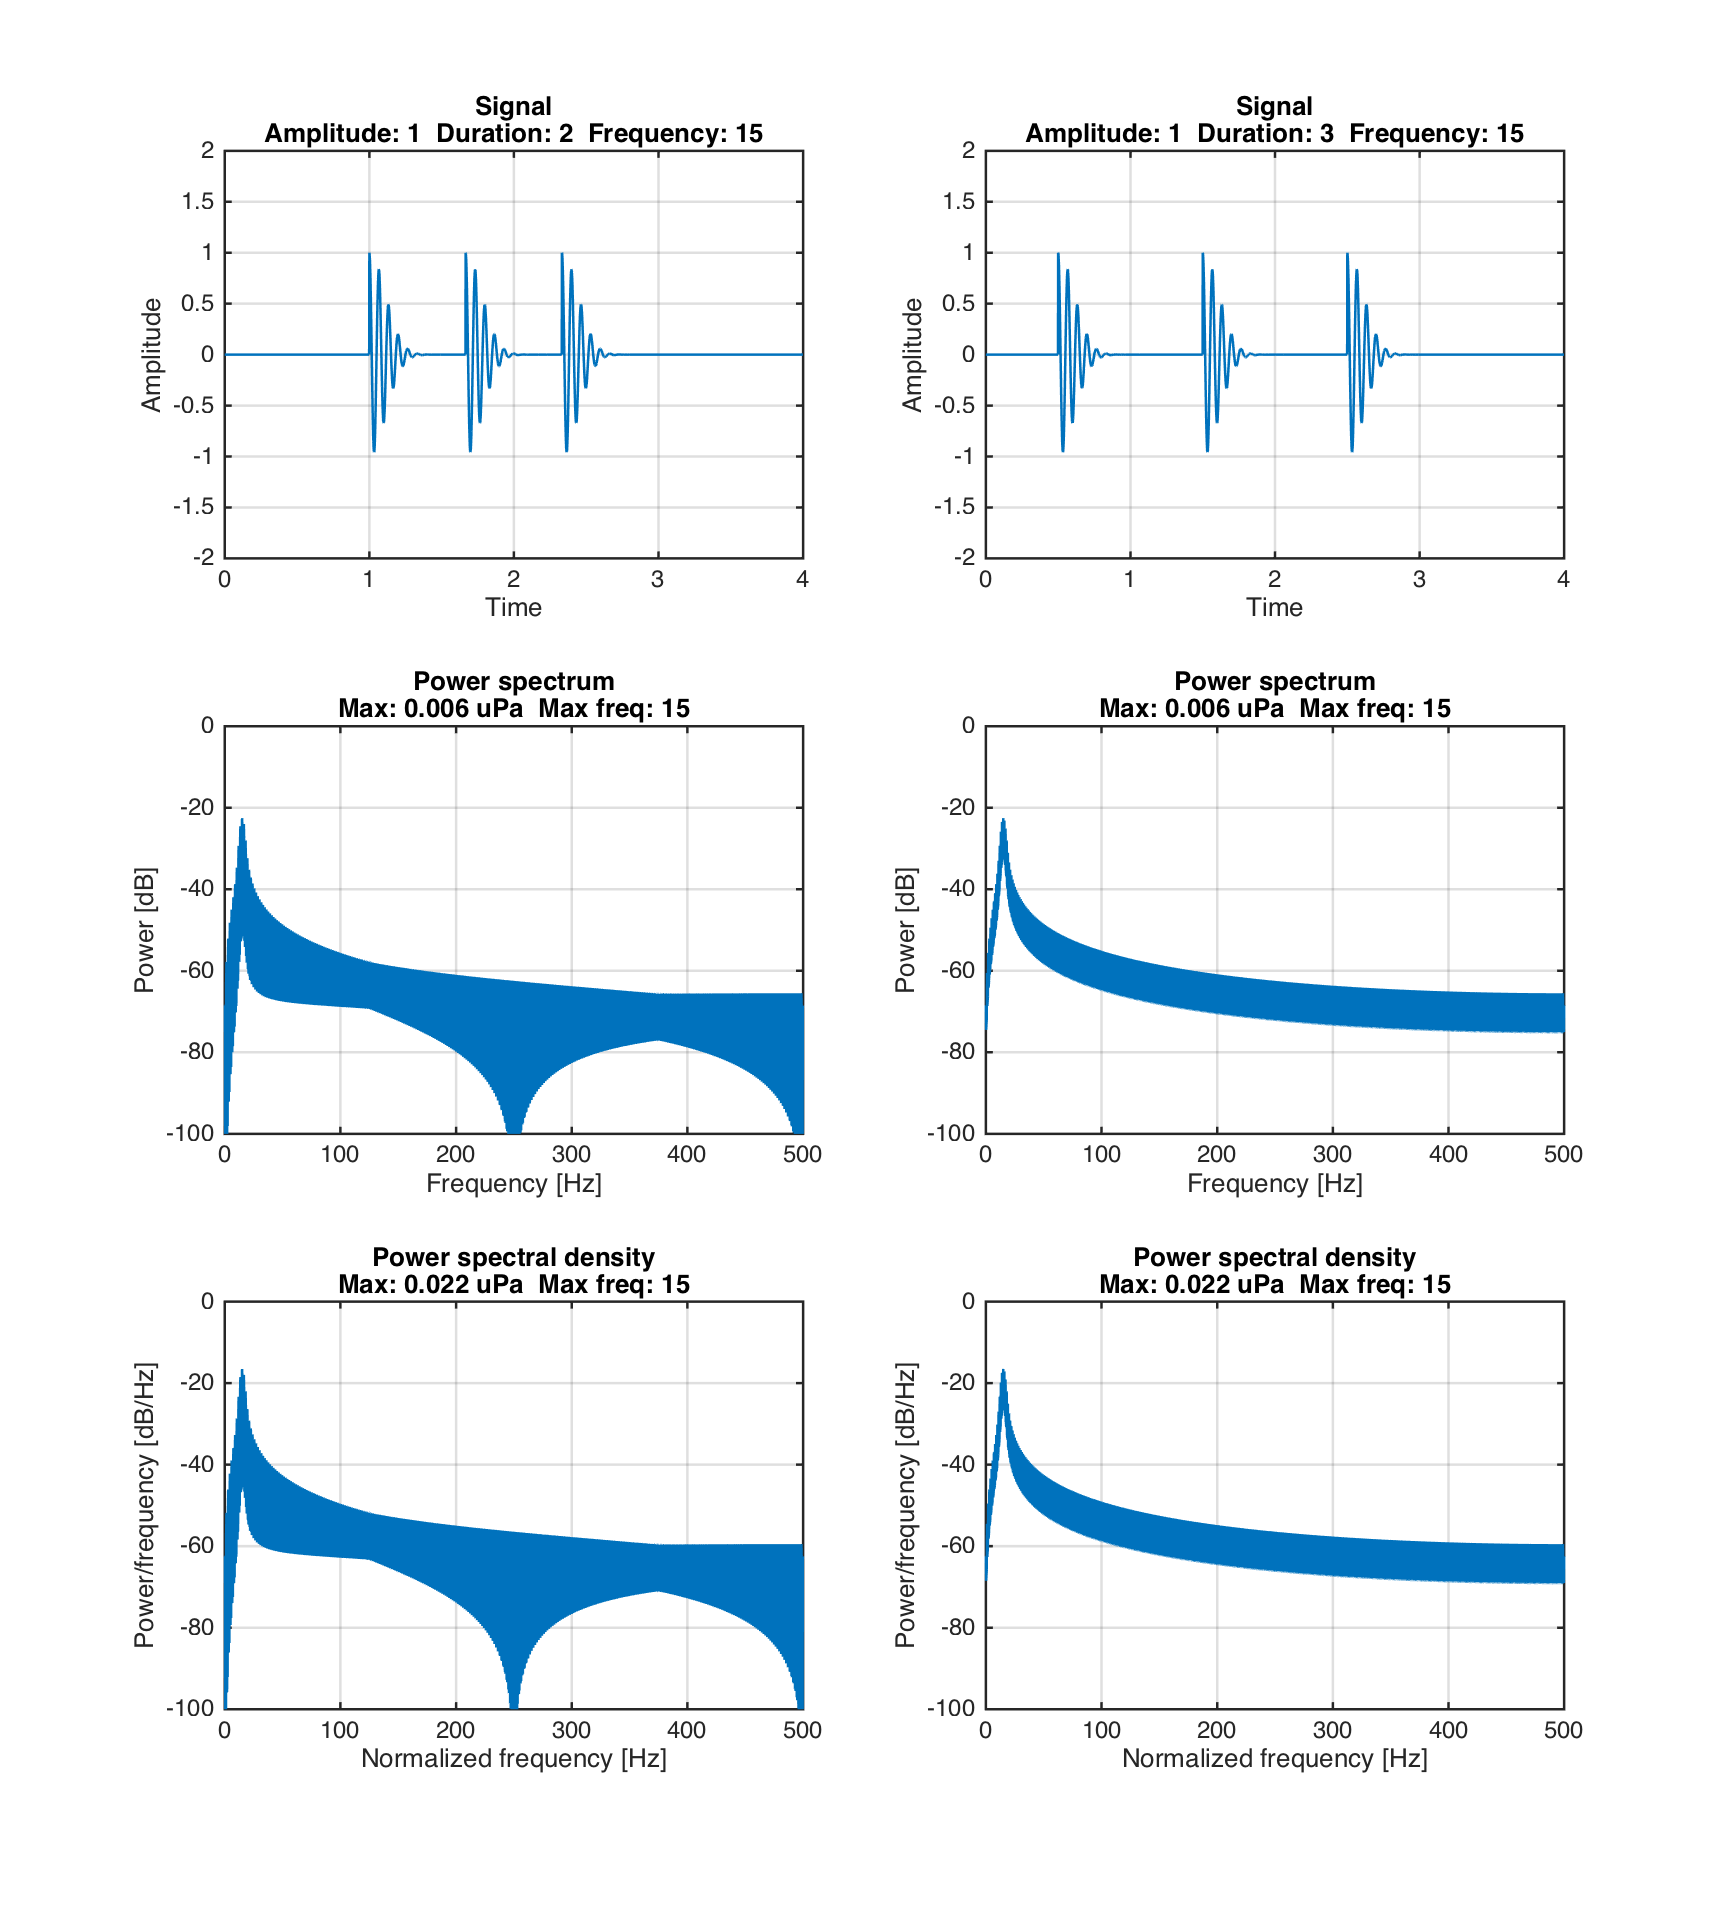

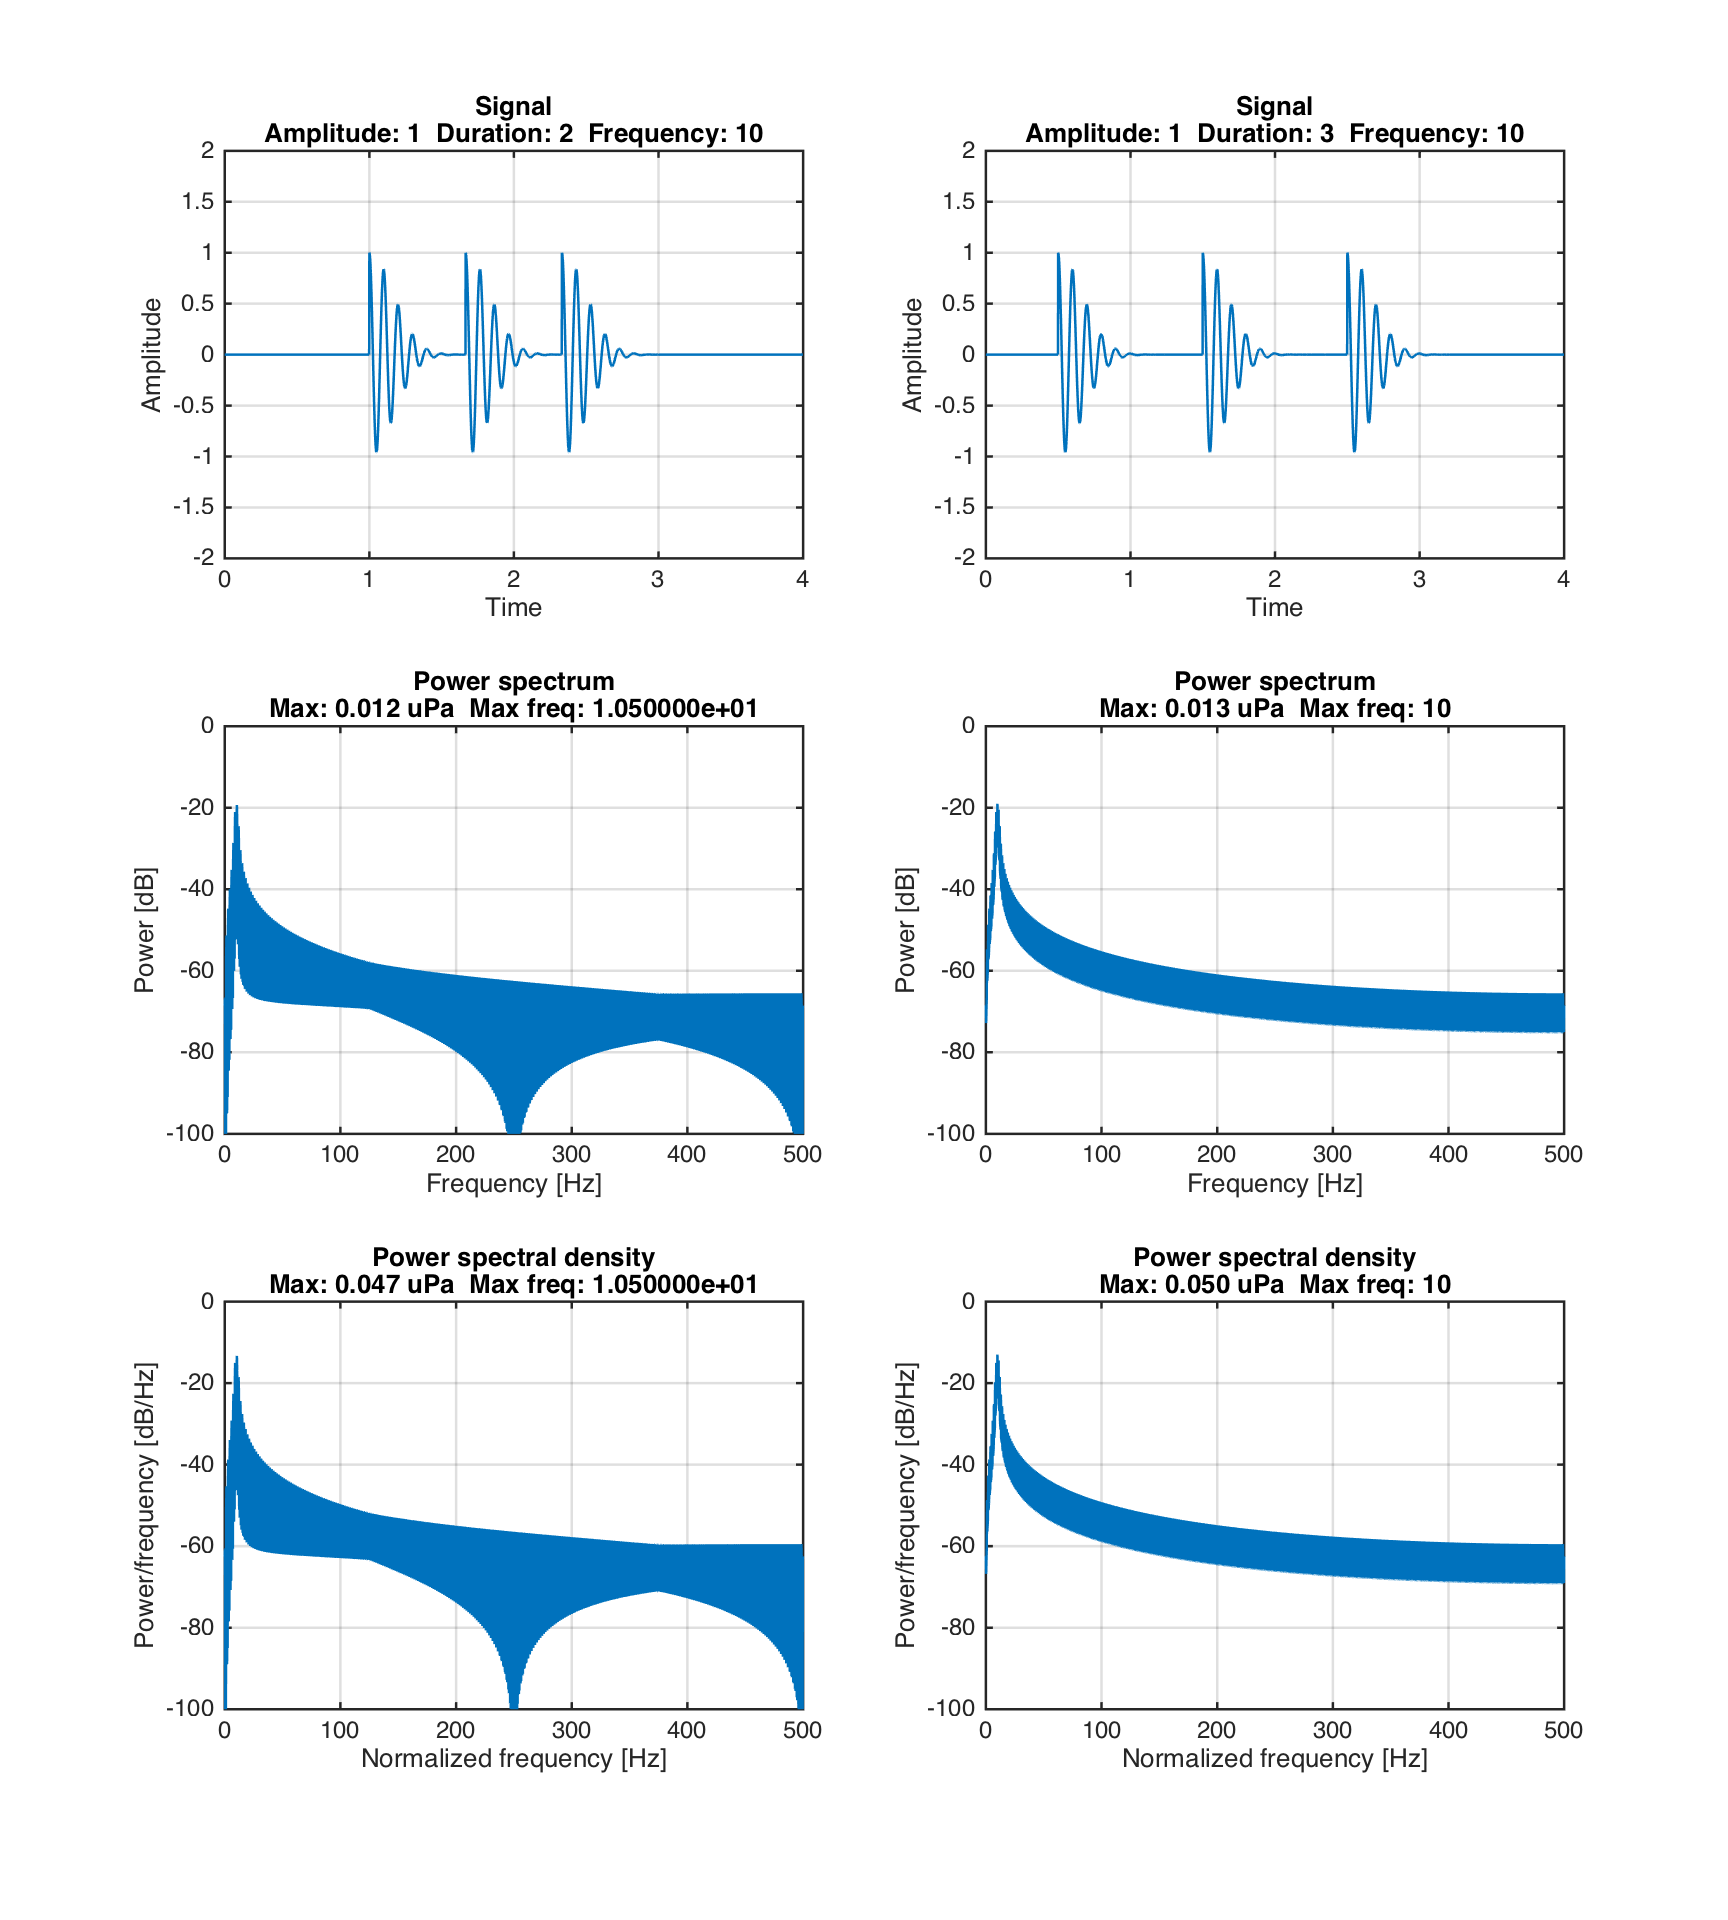

In [6]:
plot_ps_psd('pulsetrain',a,f,d,Fs,D);

### Chirp

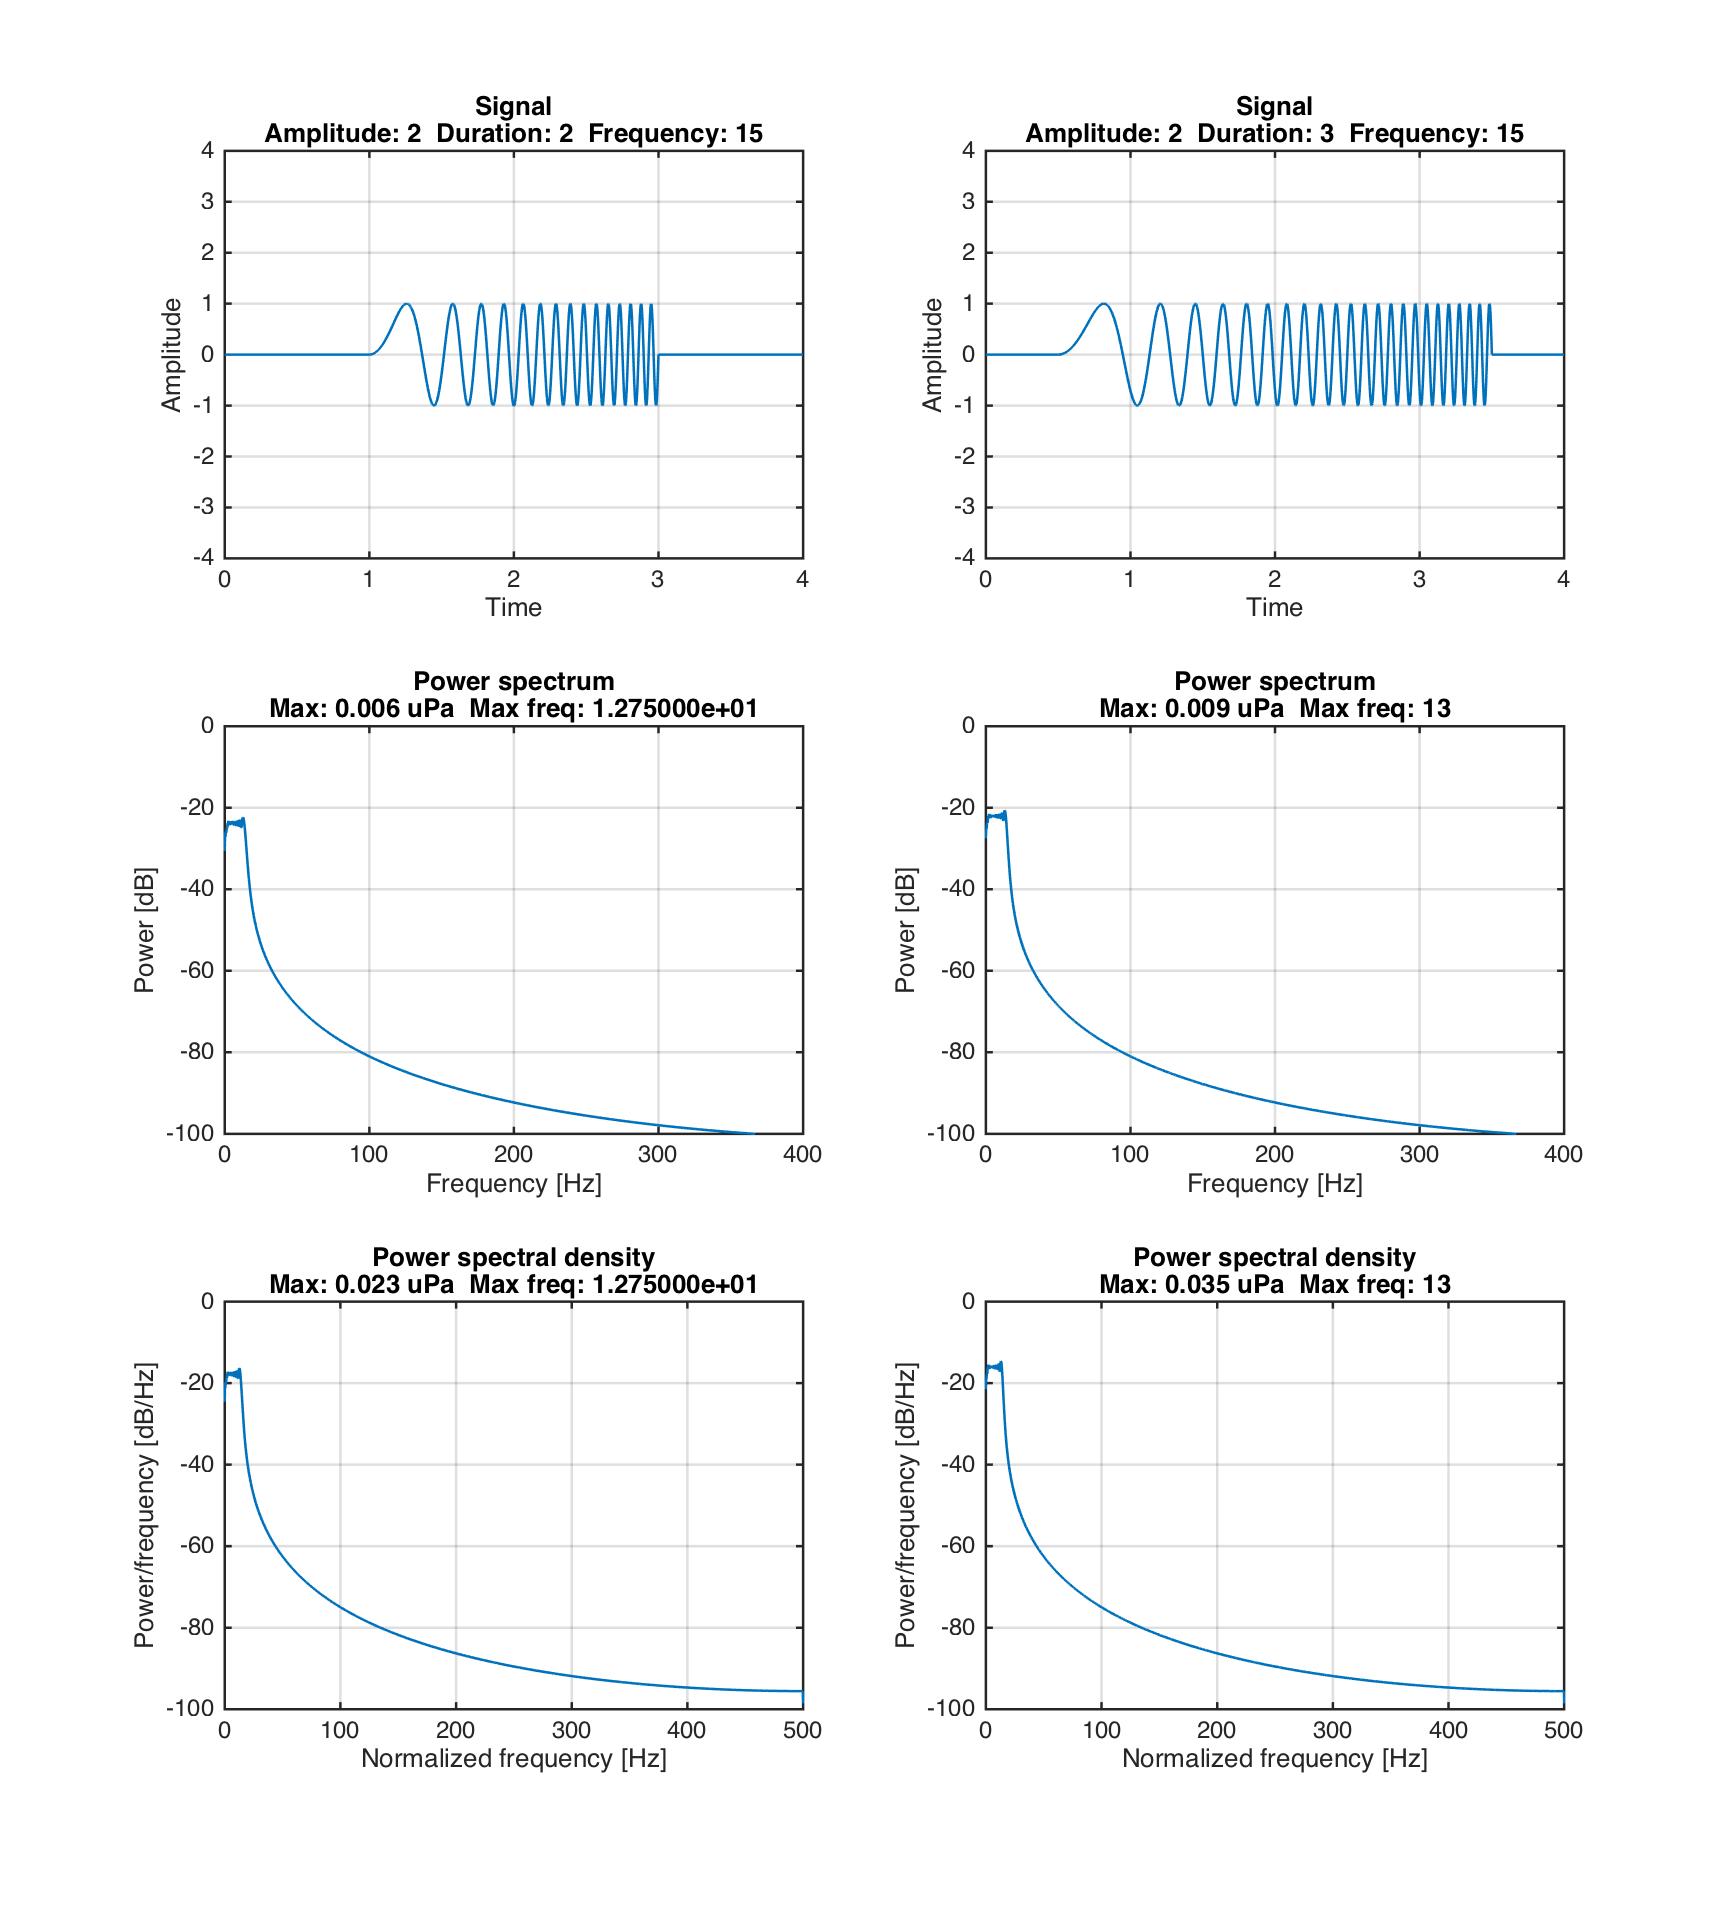

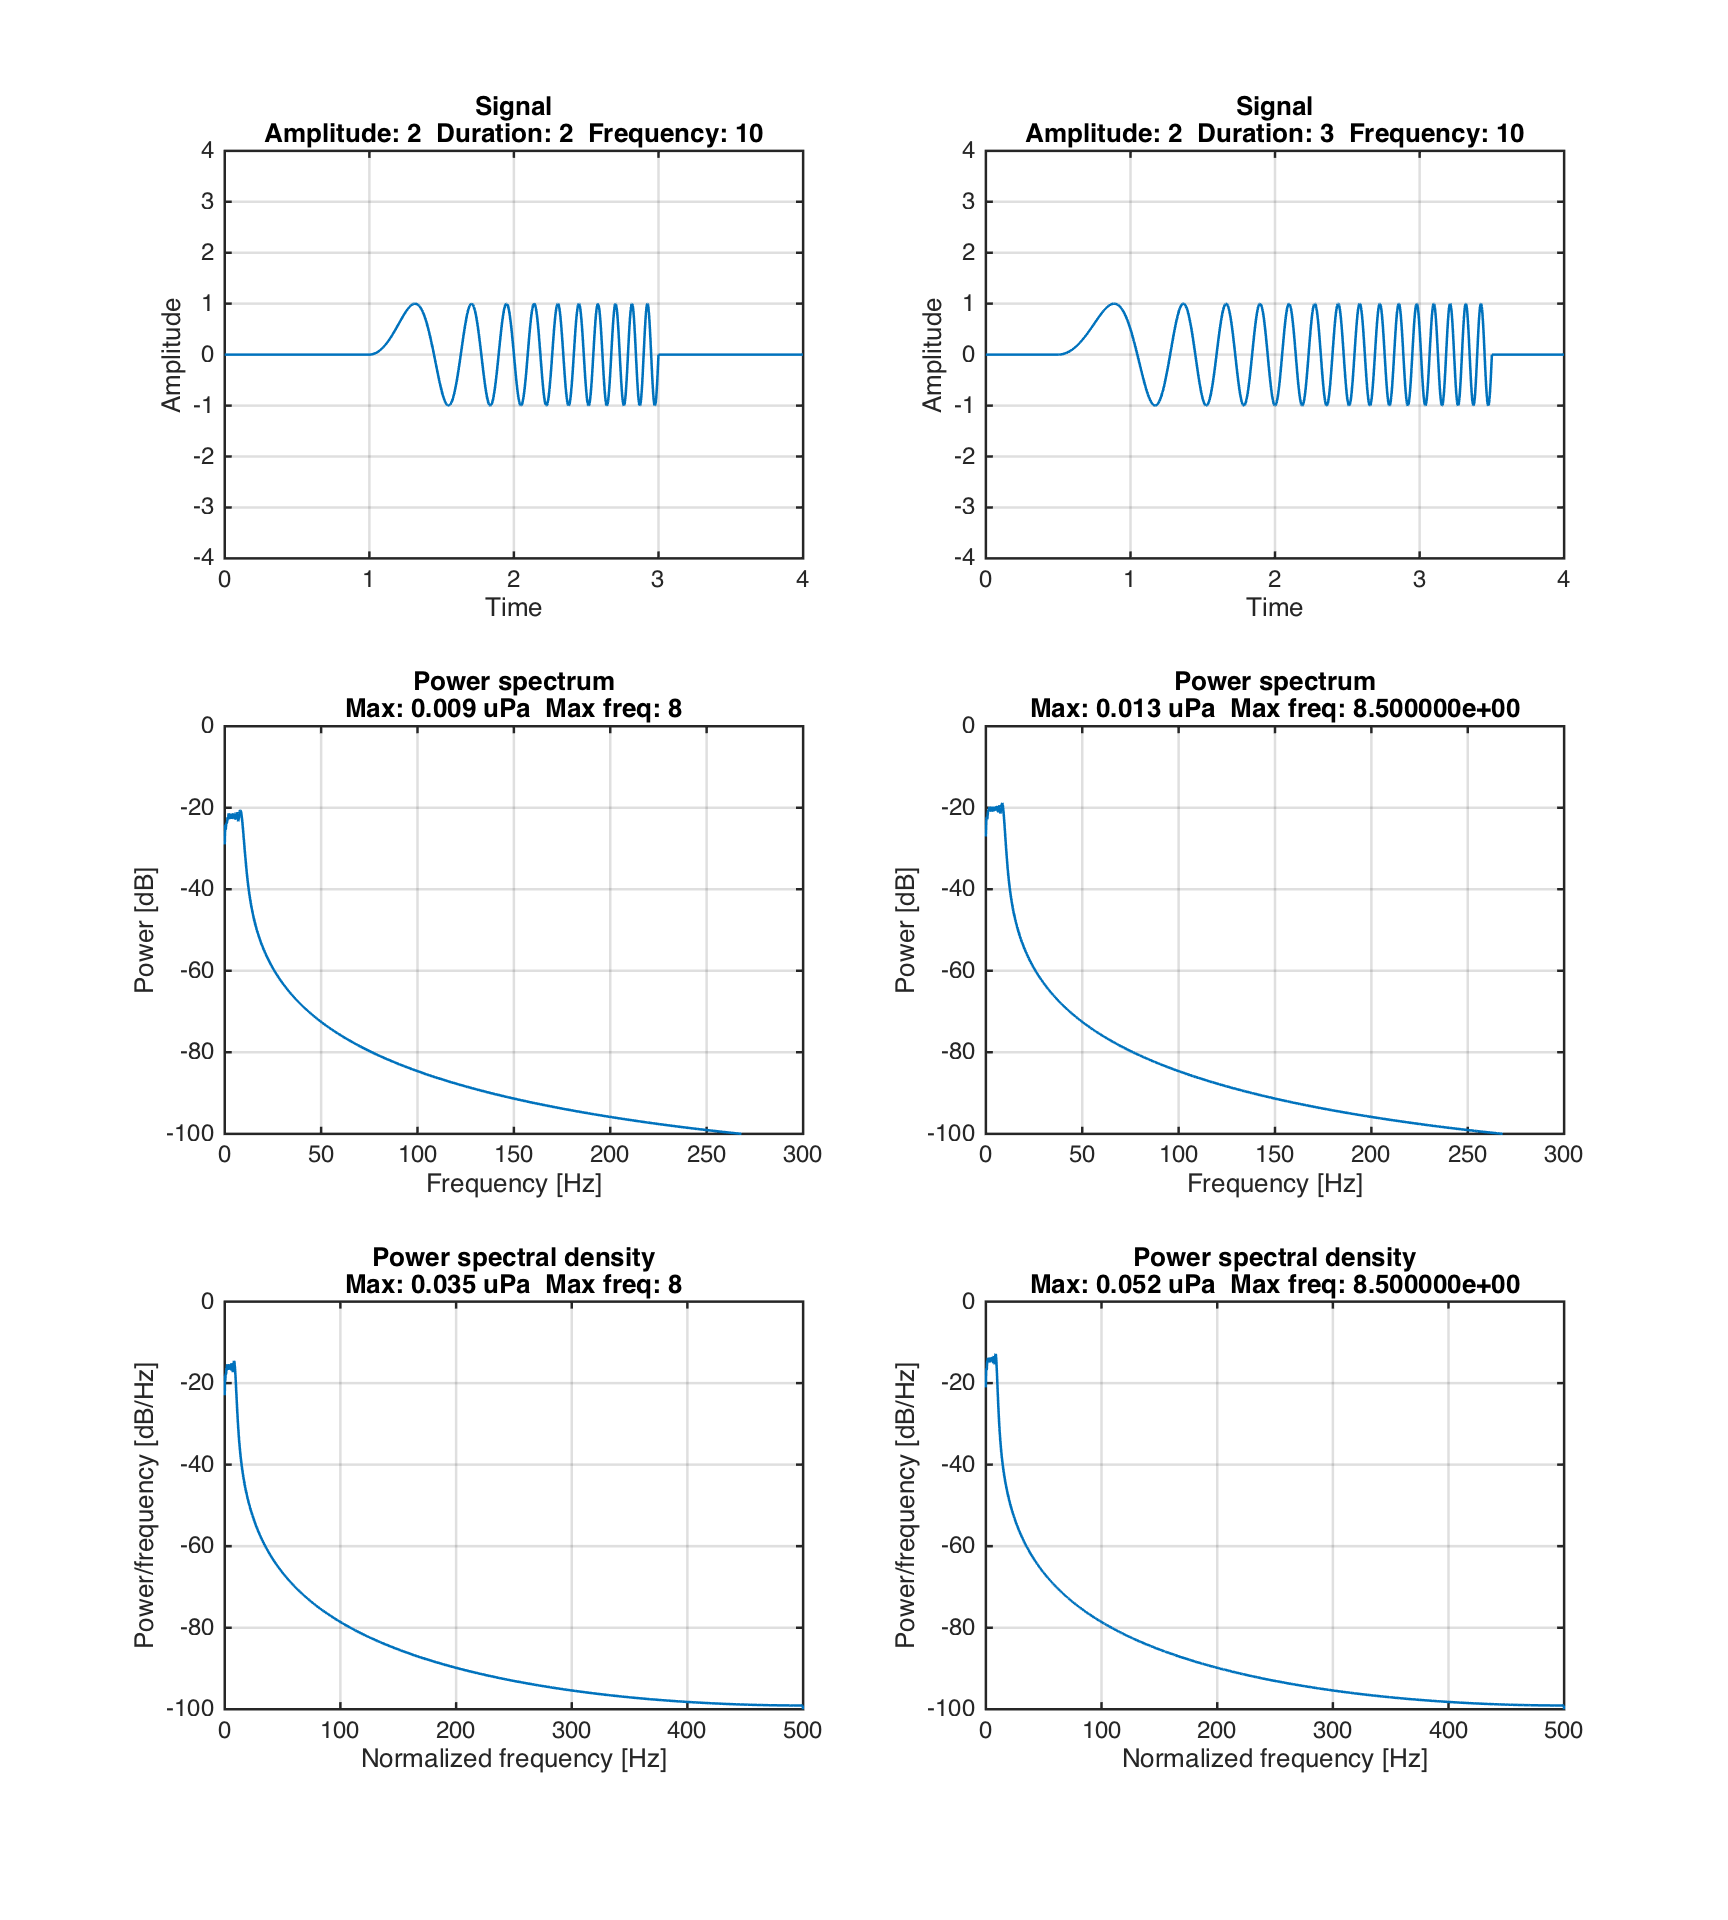

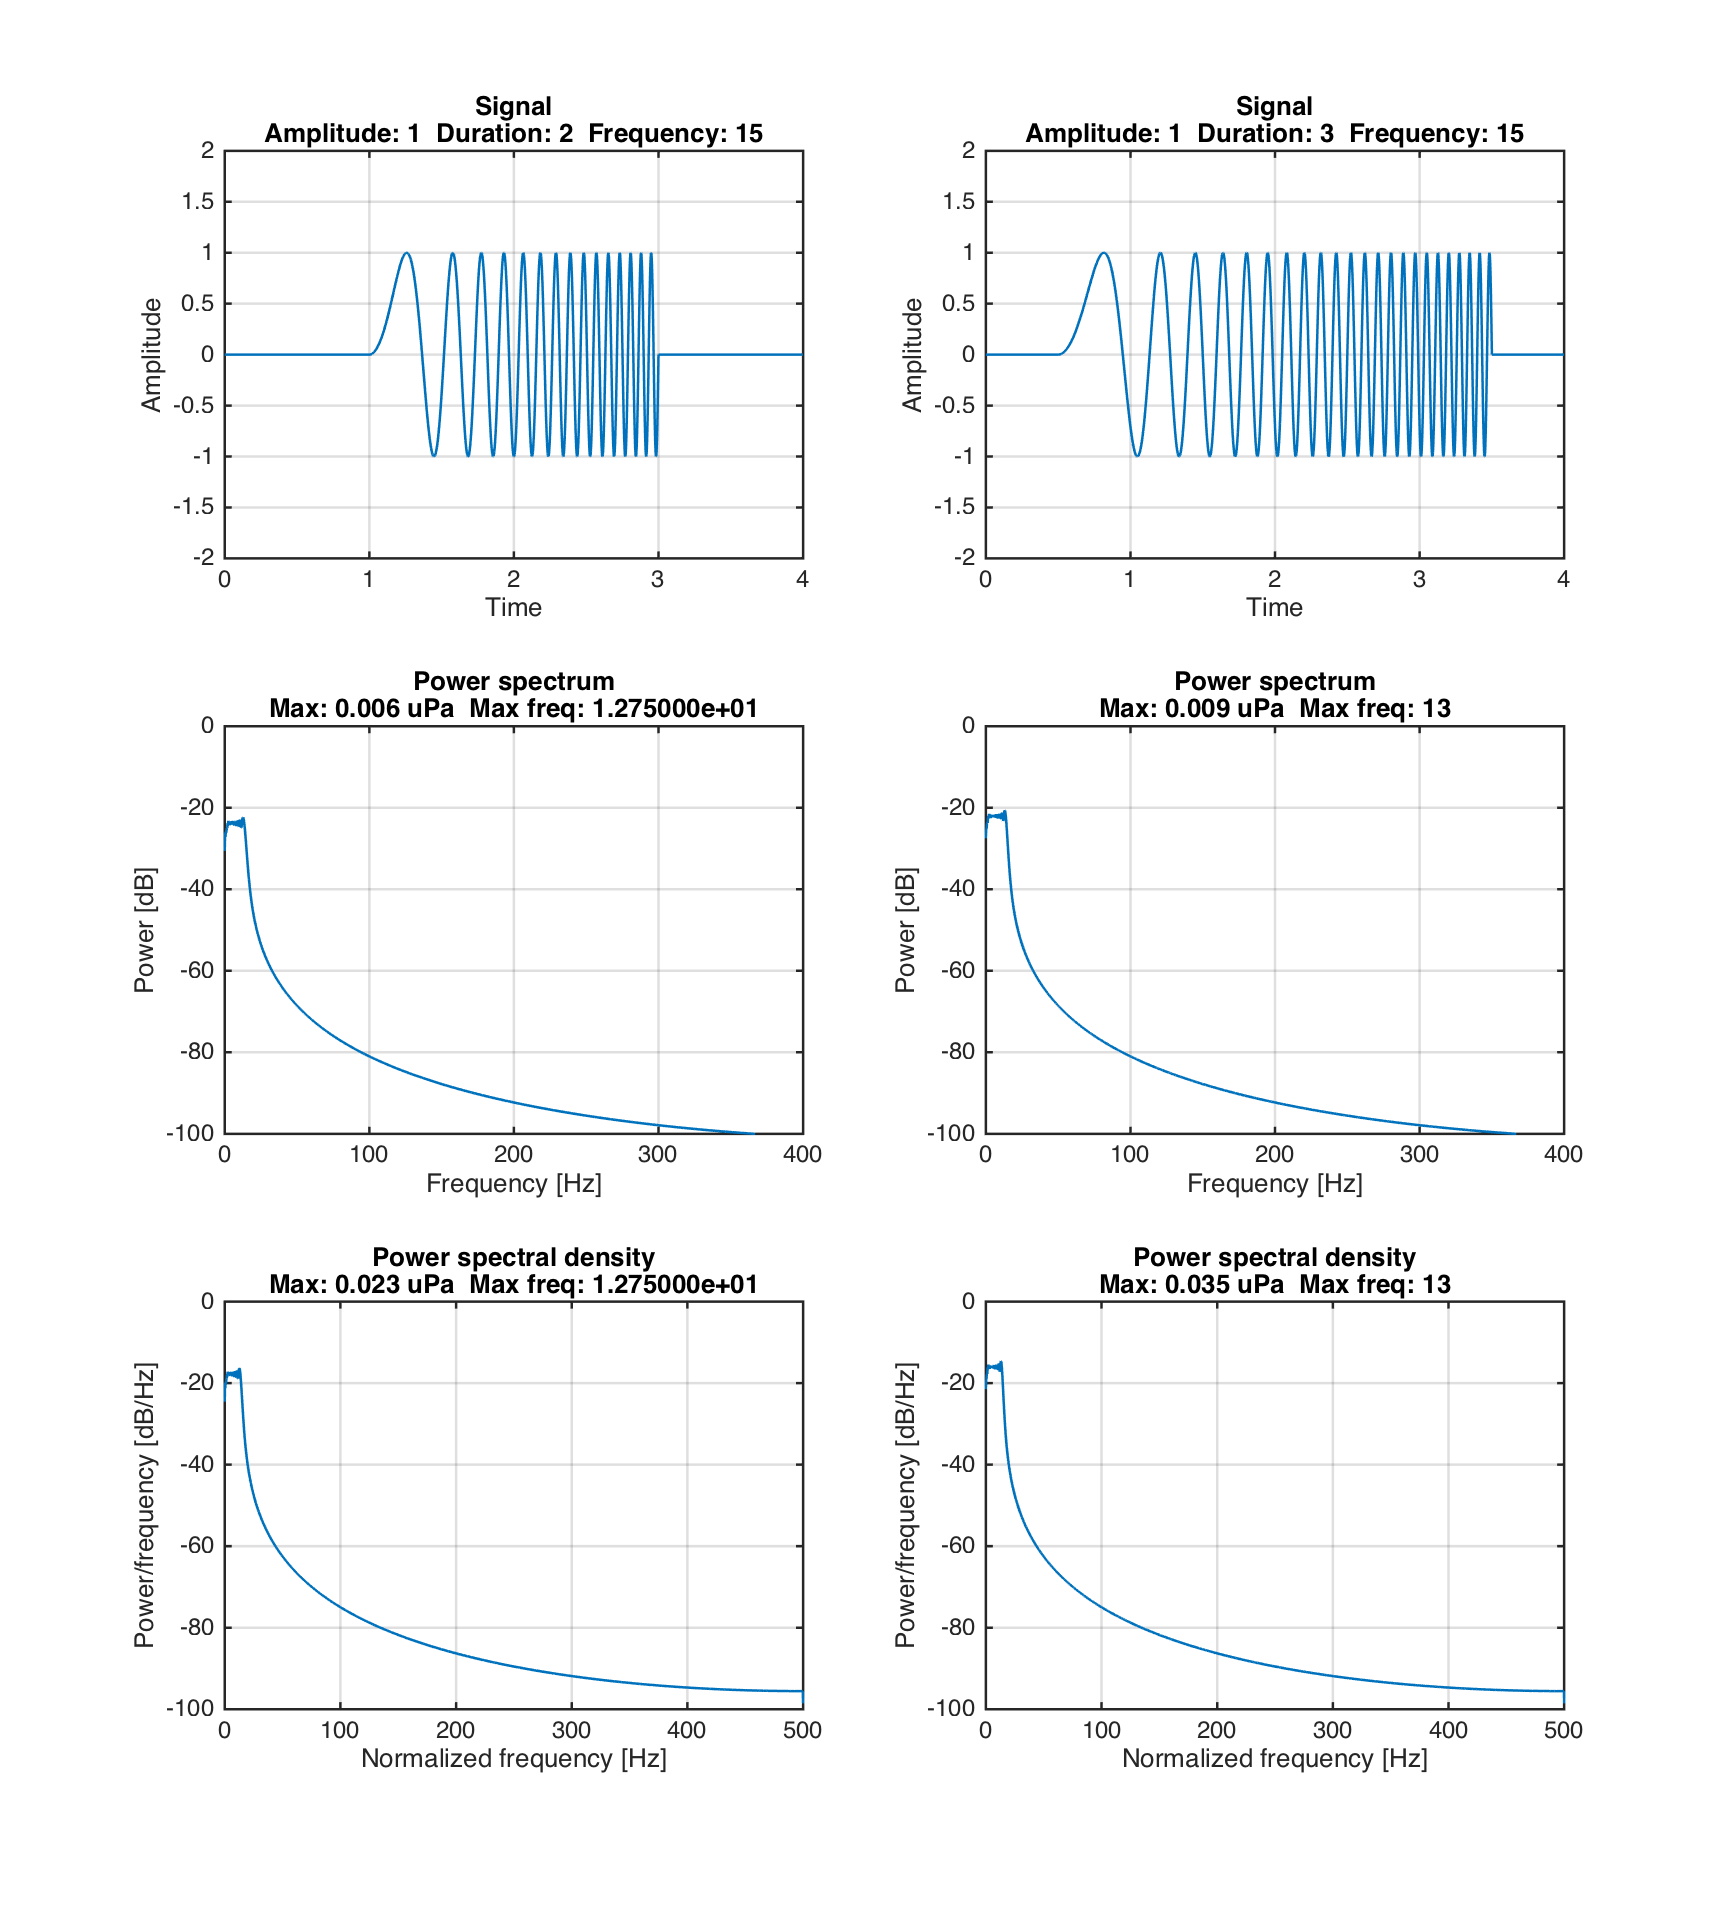

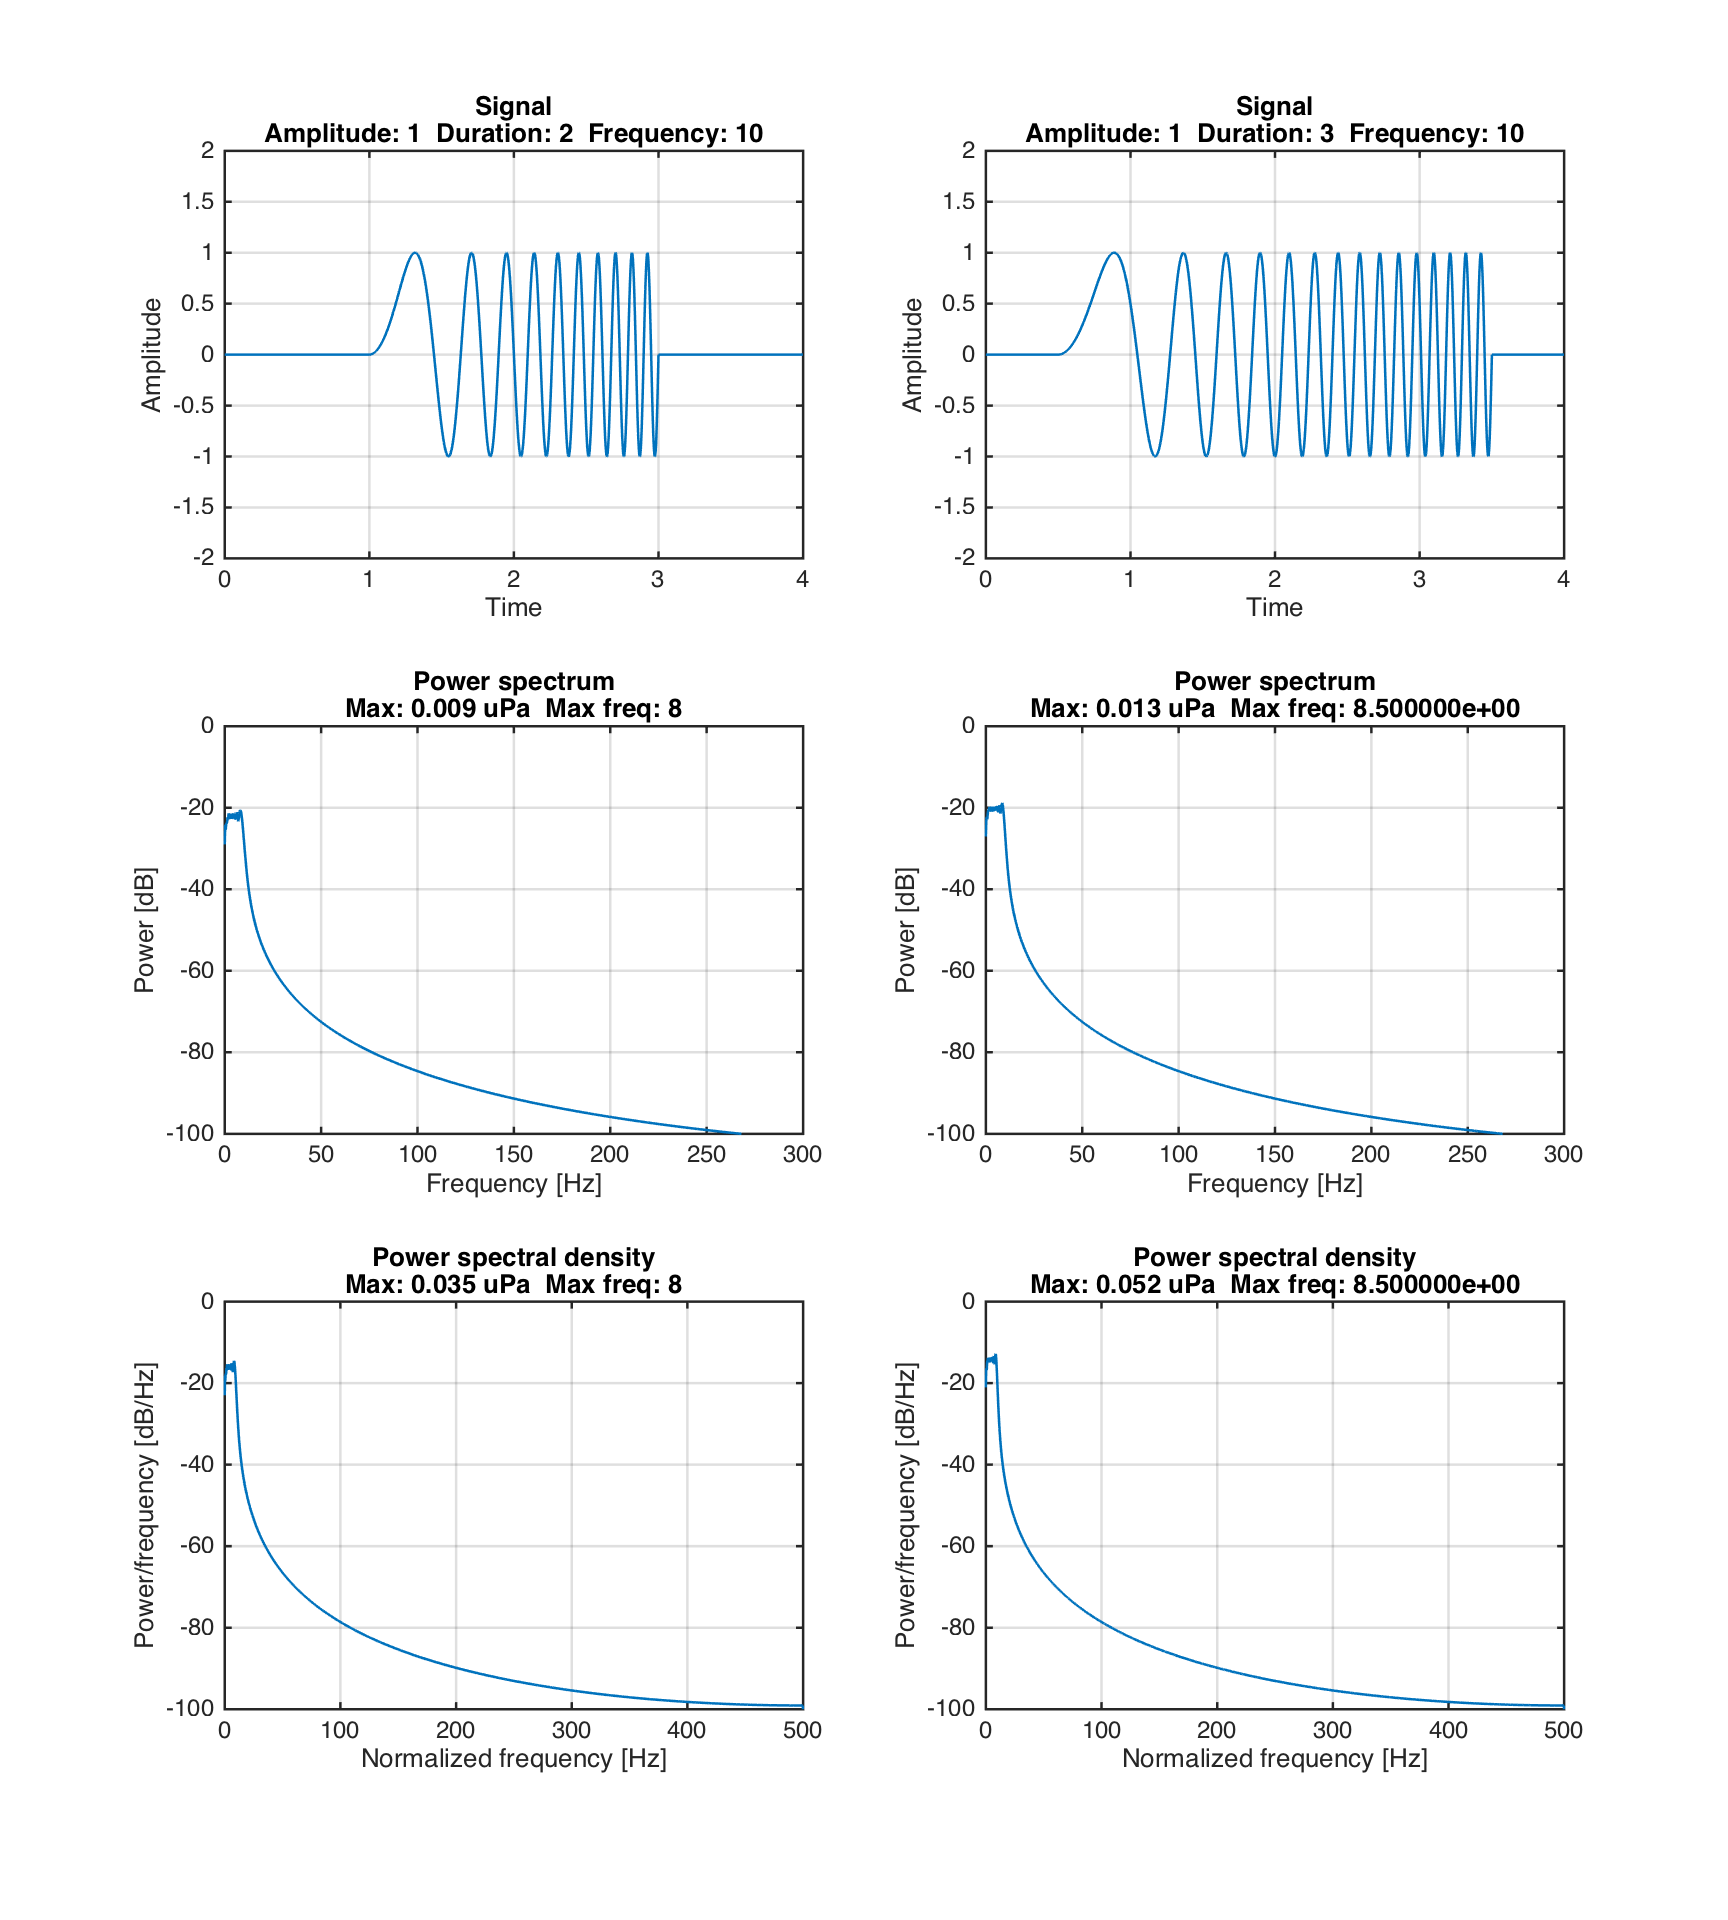

In [7]:
plot_ps_psd('chirp',a,f,d,Fs,D);